# Store Sales Data Feature Engineering

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (12, 5)


In [2]:
# load data
data = pd.read_csv("all.csv")
data["date"] = pd.to_datetime(data["date"])
data["store_nbr"] = data["store_nbr"].astype("object")
data = data.loc[data["data_type"]=="train"]
data = data.drop(["data_type"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     object        
 2   family        object        
 3   onpromotion   int64         
 4   sales         float64       
 5   transactions  float64       
 6   city          object        
 7   state         object        
 8   store_type    object        
 9   cluster       int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 251.8+ MB


In [3]:
# view data
data.tail()

date store_nbr                      family  onpromotion  \
3000883 2017-08-15         9                     POULTRY            0   
3000884 2017-08-15         9              PREPARED FOODS            1   
3000885 2017-08-15         9                     PRODUCE          148   
3000886 2017-08-15         9  SCHOOL AND OFFICE SUPPLIES            8   
3000887 2017-08-15         9                     SEAFOOD            0   

            sales  transactions   city      state store_type  cluster  
3000883   438.133        2155.0  Quito  Pichincha          B        6  
3000884   154.553        2155.0  Quito  Pichincha          B        6  
3000885  2419.729        2155.0  Quito  Pichincha          B        6  
3000886   121.000        2155.0  Quito  Pichincha          B        6  
3000887    16.000        2155.0  Quito  Pichincha          B        6

# Add Features

In [4]:
# function to extract features
def create_additional_features(df, target=None):

    # day feature
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week

    # lags & rolling featyres
    df[f'{target}_3_days_lag'] = df[target].shift(3)
    df[f'{target}_7_days_lag'] = df[target].shift(7)
    df[f'{target}_14_days_lag'] = df[target].shift(14)
    df[f'{target}_30_days_lag'] = df[target].shift(30)
    df[f'{target}_3_days_mean'] = df[target].rolling(window=3).mean()
    df[f'{target}_7_days_mean'] = df[target].rolling(window=7).mean()
    df[f'{target}_14_days_mean'] = df[target].rolling(window=14).mean()
    df[f'{target}_30_days_mean'] = df[target].rolling(window=30).mean()
    df[f'{target}_3_days_std'] = df[target].rolling(window=3).std()
    df[f'{target}_7_days_std'] = df[target].rolling(window=7).std()
    df[f'{target}_14_days_std'] = df[target].rolling(window=14).std()
    df[f'{target}_30_days_std'] = df[target].rolling(window=30).std()
    df[f'{target}_3_days_max'] = df[target].rolling(window=3).max()
    df[f'{target}_7_days_max'] = df[target].rolling(window=7).max()
    df[f'{target}_14_days_max'] = df[target].rolling(window=14).max()
    df[f'{target}_30_days_max'] = df[target].rolling(window=30).max()
    df[f'{target}_3_days_min'] = df[target].rolling(window=3).min()
    df[f'{target}_7_days_min'] = df[target].rolling(window=7).min()
    df[f'{target}_14_days_min'] = df[target].rolling(window=14).min()
    df[f'{target}_30_days_min'] = df[target].rolling(window=30).min()

    return df

In [5]:
# create features for each store
store_nbrs = data["store_nbr"].unique()
df_list = []

for s in store_nbrs:
    _df = data.loc[data["store_nbr"]==s].sort_values("date")
    _df = _df.groupby(
        ["date", "store_nbr", "city", "state", "store_type", "cluster"]
        )[["onpromotion", "sales", "transactions"]].sum().reset_index()
    _df = create_additional_features(_df, target="sales")
    _df = create_additional_features(_df, target="transactions")
    df_list.append(_df)

data_with_features = pd.concat(df_list).reset_index()

In [16]:
data_with_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      90936 non-null  int64         
 1   date                       90936 non-null  datetime64[ns]
 2   store_nbr                  90936 non-null  int64         
 3   city                       90936 non-null  object        
 4   state                      90936 non-null  object        
 5   store_type                 90936 non-null  object        
 6   cluster                    90936 non-null  int64         
 7   onpromotion                90936 non-null  int64         
 8   sales                      90936 non-null  float64       
 9   transactions               90936 non-null  float64       
 10  dayofweek                  90936 non-null  int64         
 11  quarter                    90936 non-null  int64         
 12  mont

# Exploratory Analysis

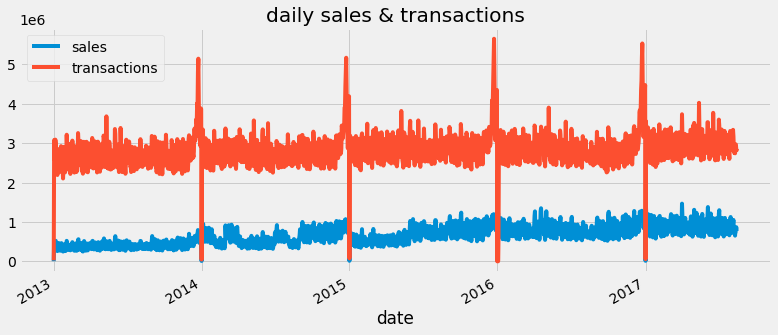

In [6]:
data_with_features.groupby("date")["sales"].sum().plot()
data_with_features.groupby("date")["transactions"].sum().plot()
plt.title("daily sales & transactions")
plt.legend()
plt.show()

In [7]:
# features
data_with_features.columns

Index(['index', 'date', 'store_nbr', 'city', 'state', 'store_type', 'cluster',
       'onpromotion', 'sales', 'transactions', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'sales_3_days_lag',
       'sales_7_days_lag', 'sales_14_days_lag', 'sales_30_days_lag',
       'sales_3_days_mean', 'sales_7_days_mean', 'sales_14_days_mean',
       'sales_30_days_mean', 'sales_3_days_std', 'sales_7_days_std',
       'sales_14_days_std', 'sales_30_days_std', 'sales_3_days_max',
       'sales_7_days_max', 'sales_14_days_max', 'sales_30_days_max',
       'sales_3_days_min', 'sales_7_days_min', 'sales_14_days_min',
       'sales_30_days_min', 'transactions_3_days_lag',
       'transactions_7_days_lag', 'transactions_14_days_lag',
       'transactions_30_days_lag', 'transactions_3_days_mean',
       'transactions_7_days_mean', 'transactions_14_days_mean',
       'transactions_30_days_mean', 'transactions_3_days_std',
       'transactions_7_days_std', 'transact

In [8]:
# features
targets = ['sales', 'transactions']
store_features = ['store_nbr', 'city', 'state', 'store_type', 'cluster', 'onpromotion']
date_features = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']
sales_features = [
    'sales_3_days_lag', 'sales_7_days_lag', 'sales_14_days_lag', 'sales_30_days_lag',
    'sales_3_days_mean', 'sales_7_days_mean', 'sales_14_days_mean', 'sales_30_days_mean', 
    'sales_3_days_std', 'sales_7_days_std', 'sales_14_days_std', 'sales_30_days_std', 
    'sales_3_days_max', 'sales_7_days_max', 'sales_14_days_max', 'sales_30_days_max',
    'sales_3_days_min', 'sales_7_days_min', 'sales_14_days_min', 'sales_30_days_min'
]
trans_features = [
    'transactions_3_days_lag', 'transactions_7_days_lag', 'transactions_14_days_lag', 'transactions_30_days_lag', 
    'transactions_3_days_mean', 'transactions_7_days_mean', 'transactions_14_days_mean', 'transactions_30_days_mean', 
    'transactions_3_days_std', 'transactions_7_days_std', 'transactions_14_days_std', 'transactions_30_days_std', 
    'transactions_3_days_max', 'transactions_7_days_max', 'transactions_14_days_max', 'transactions_30_days_max', 
    'transactions_3_days_min', 'transactions_7_days_min', 'transactions_14_days_min', 'transactions_30_days_min'
]

[Step 2/3] Processing Pairwise Features      |          | [  0%]   03:36 -> (? left)eft)
Feature: transactions_30_days_min            |██████████| [100%]   00:11 -> (00:00 left)



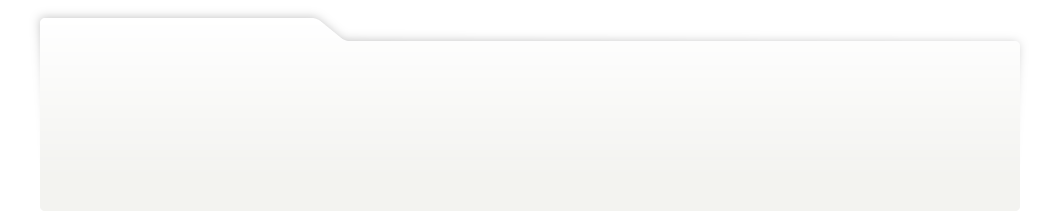
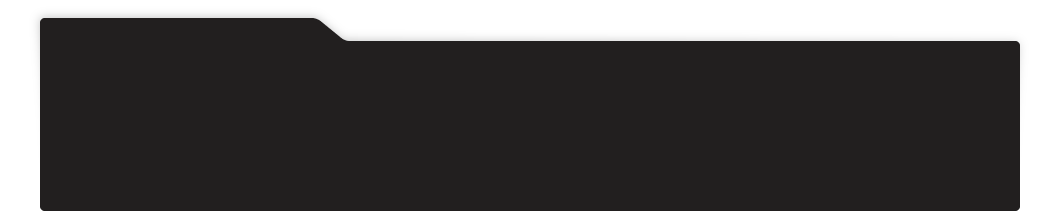
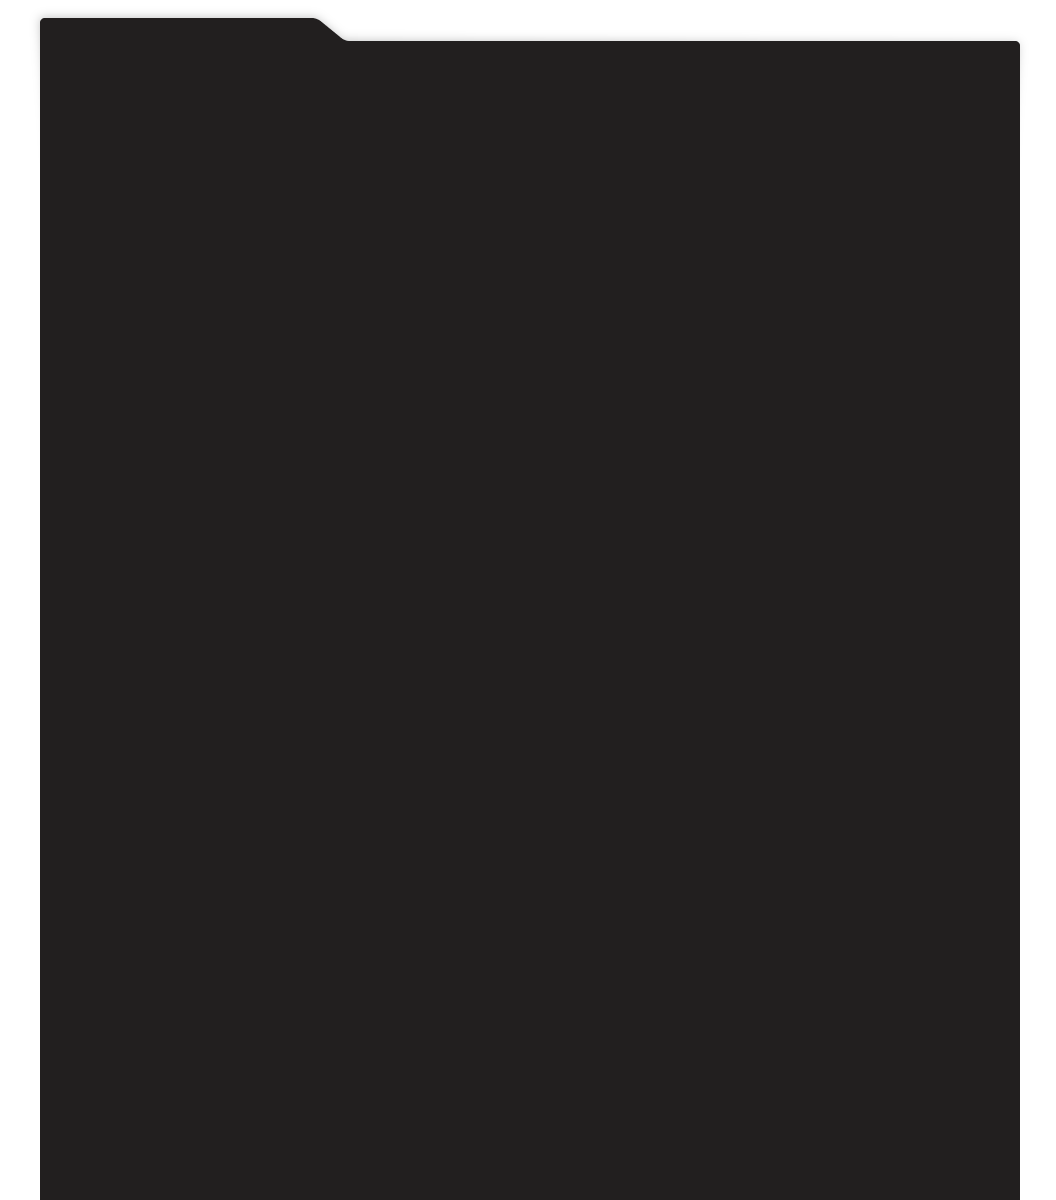
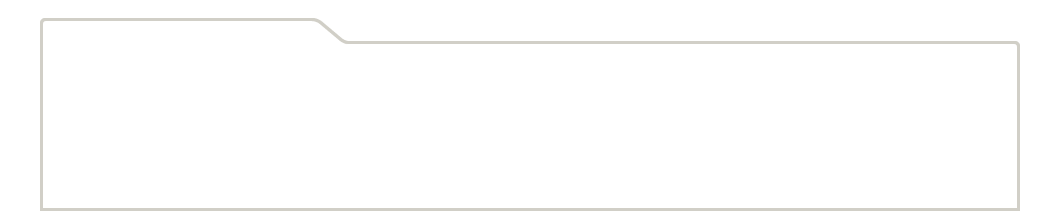
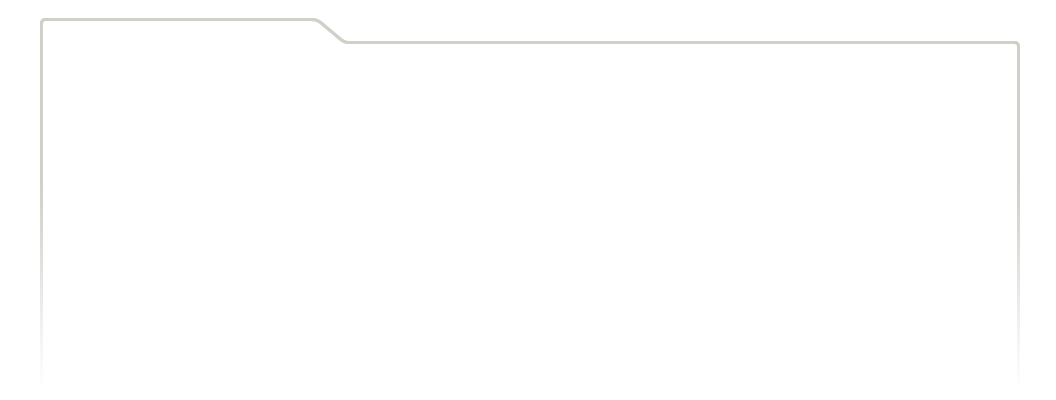
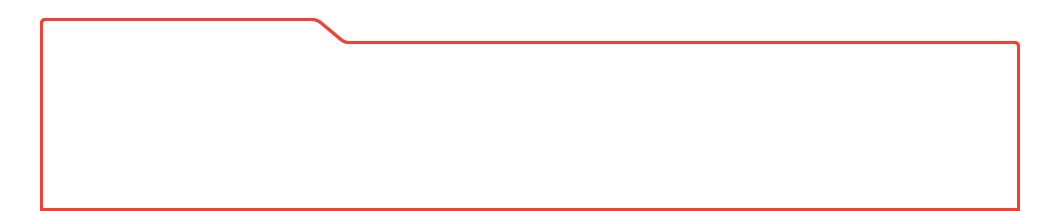
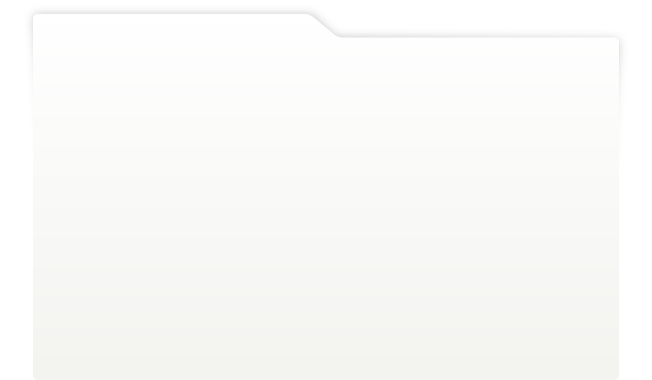
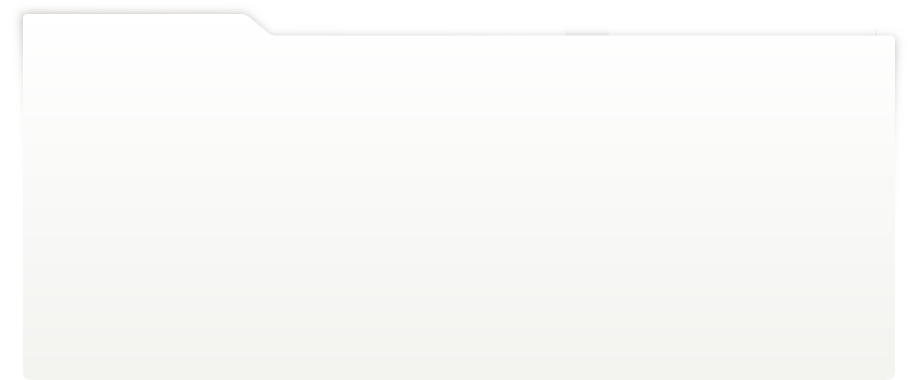
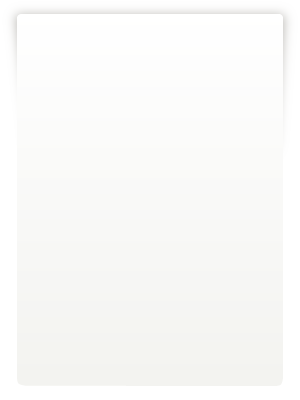
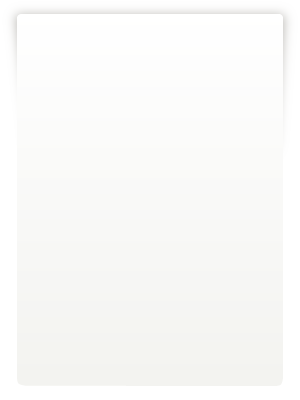
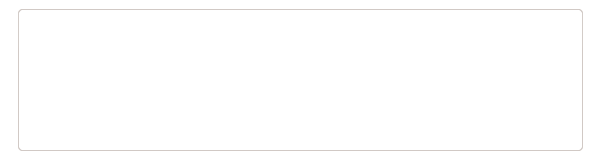
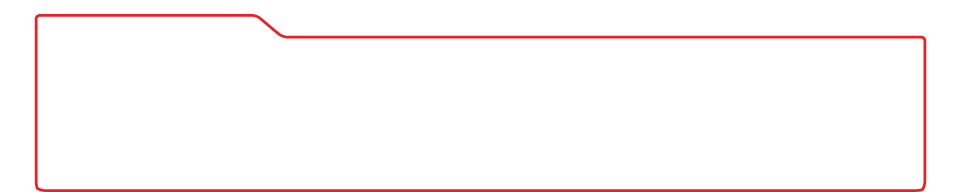
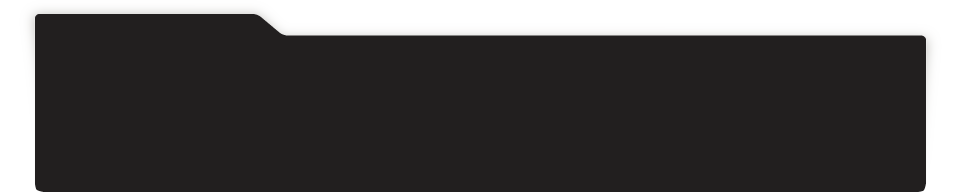
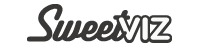
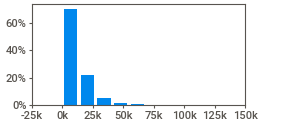
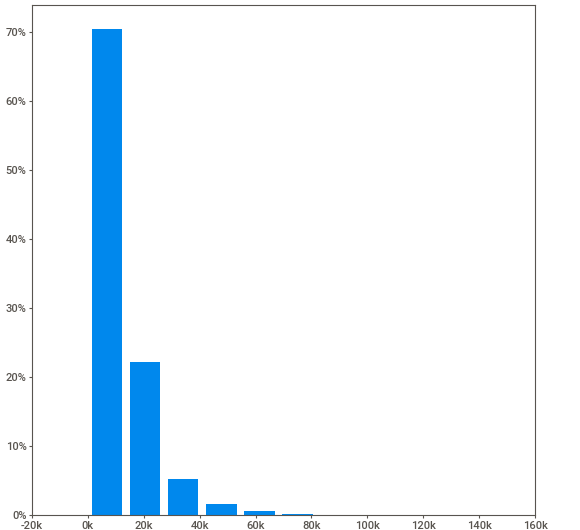
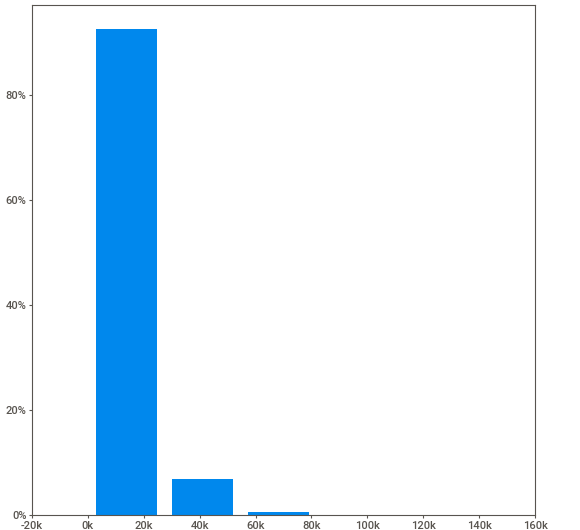
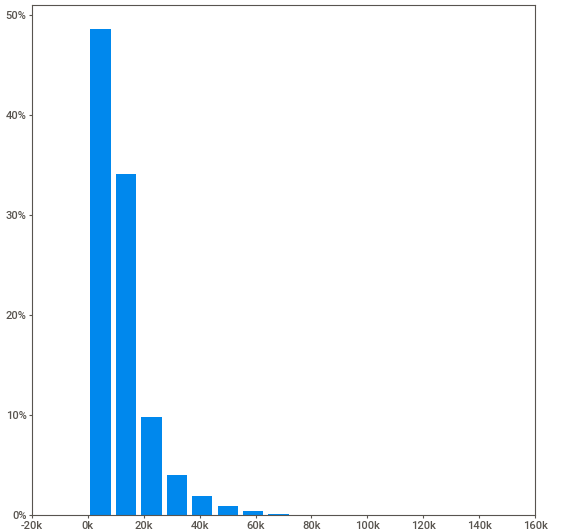
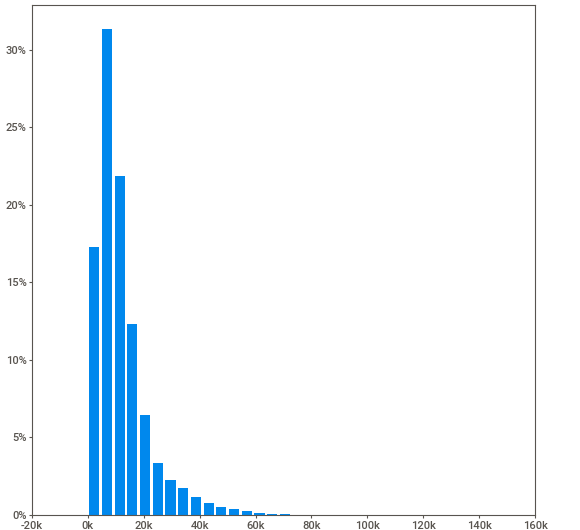
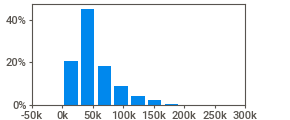
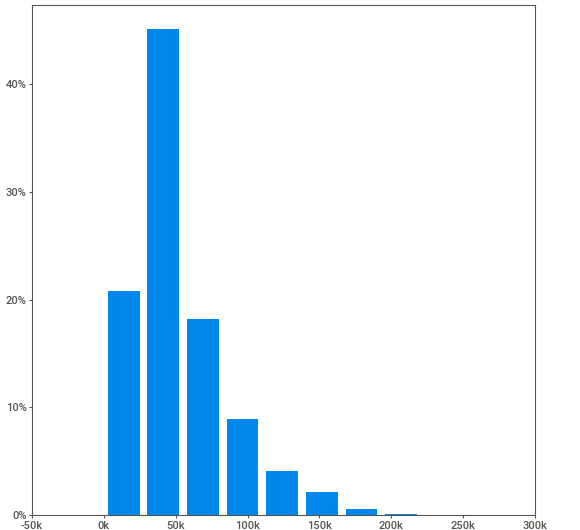
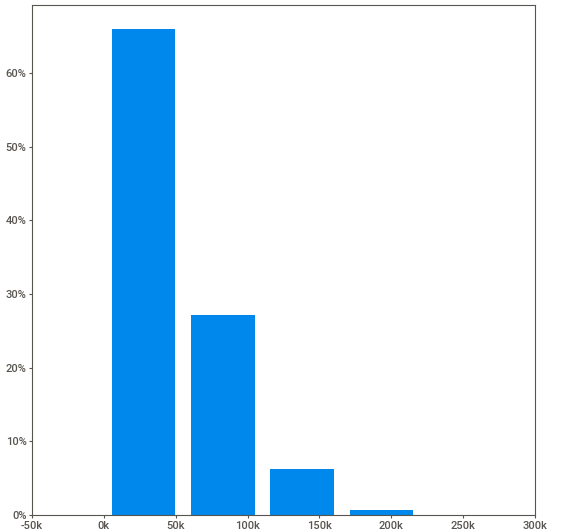
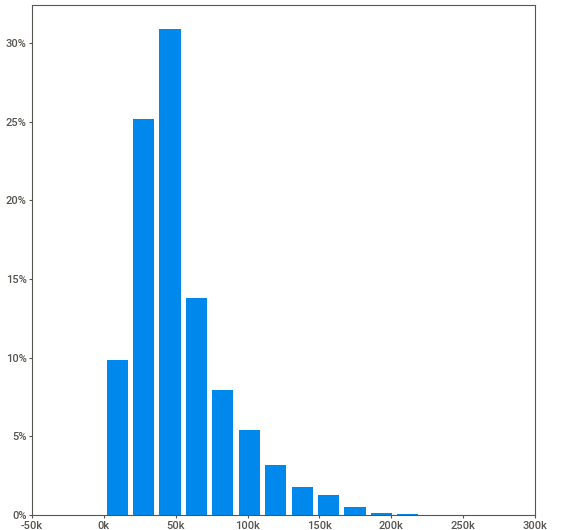
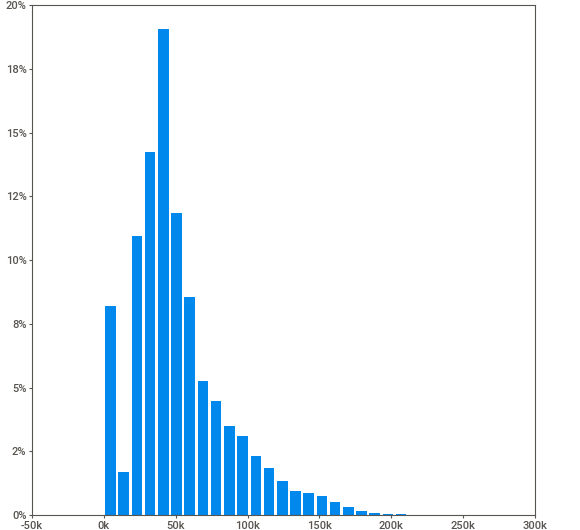
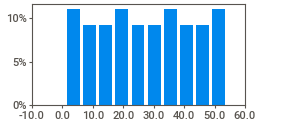
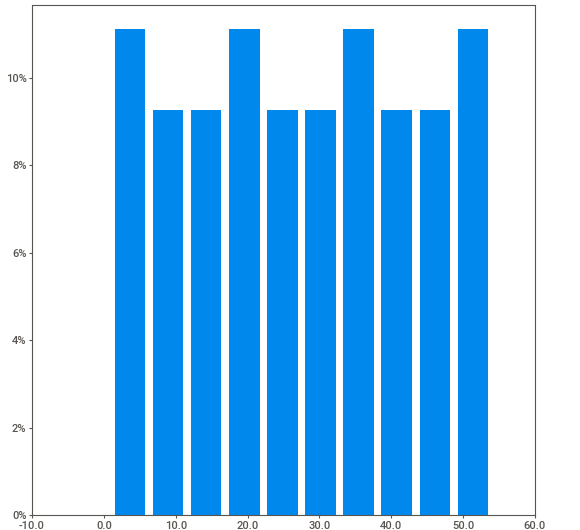
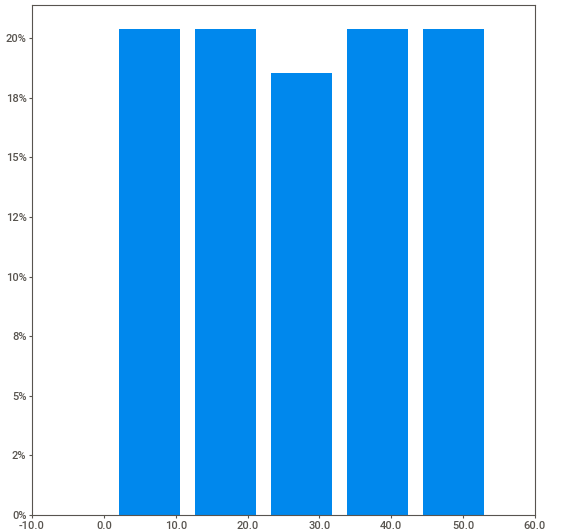
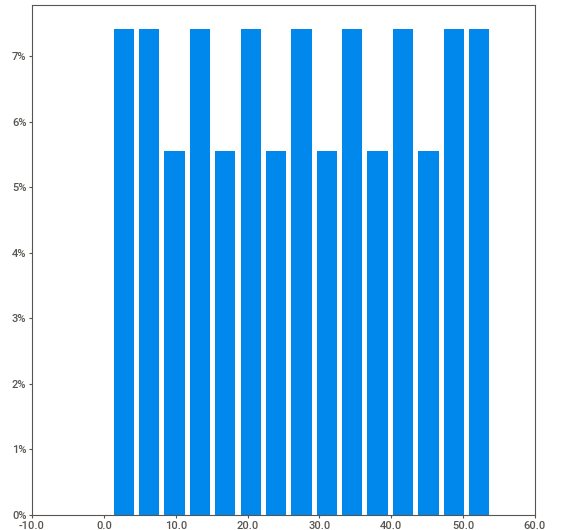
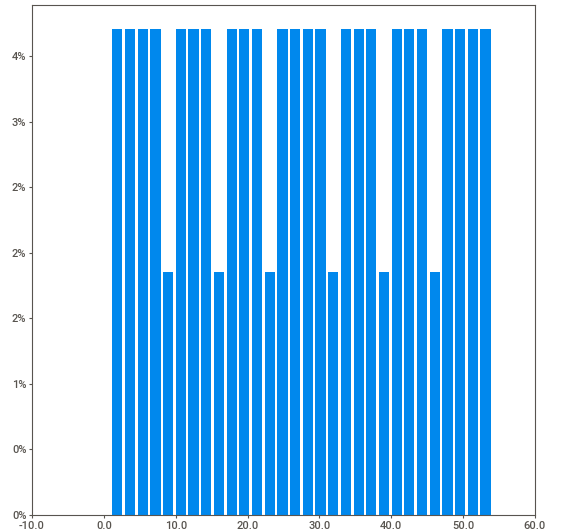
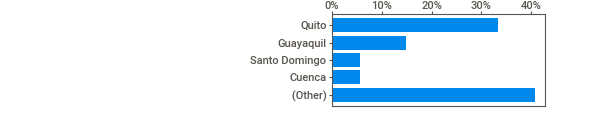
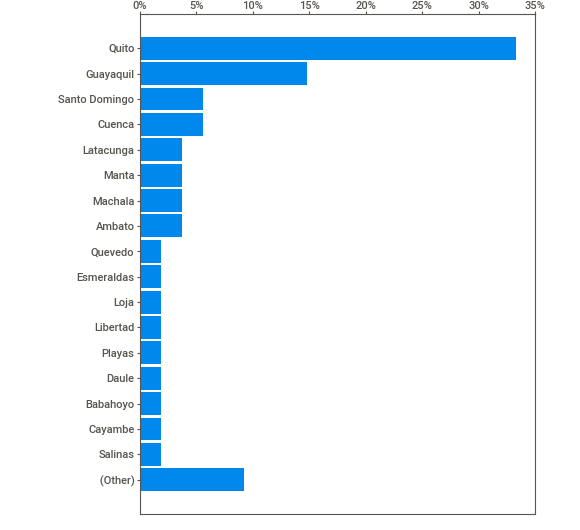
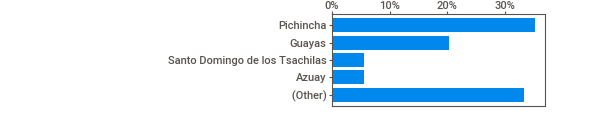
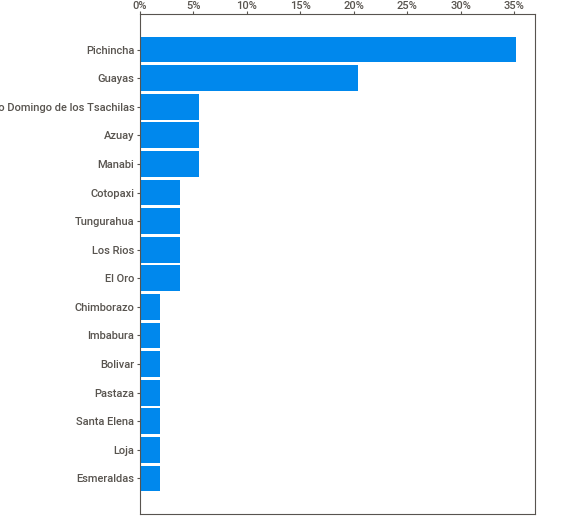
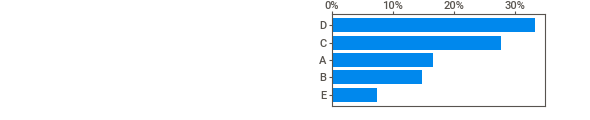
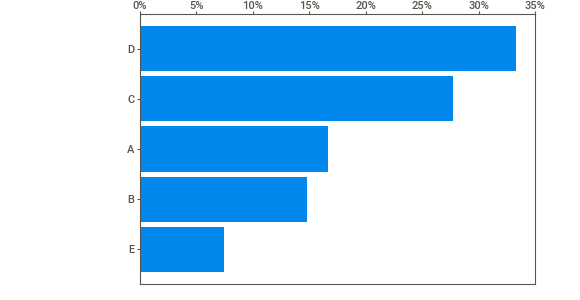
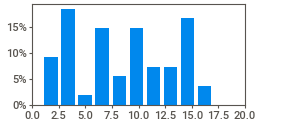
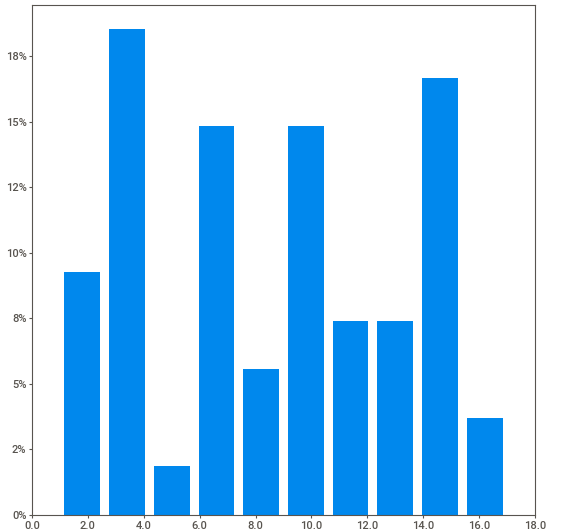
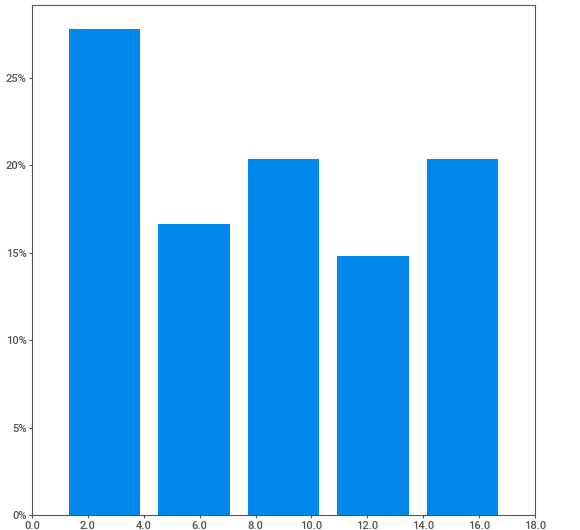
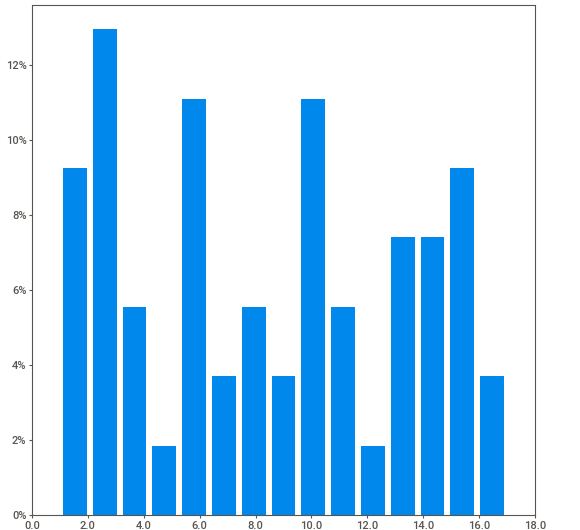
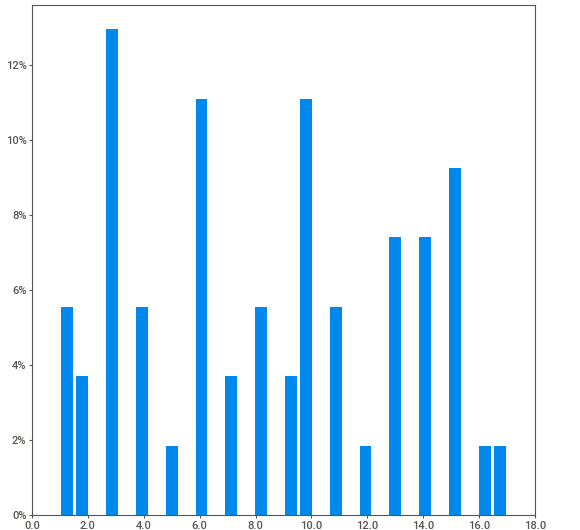
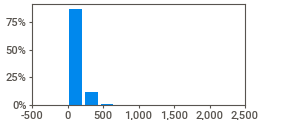
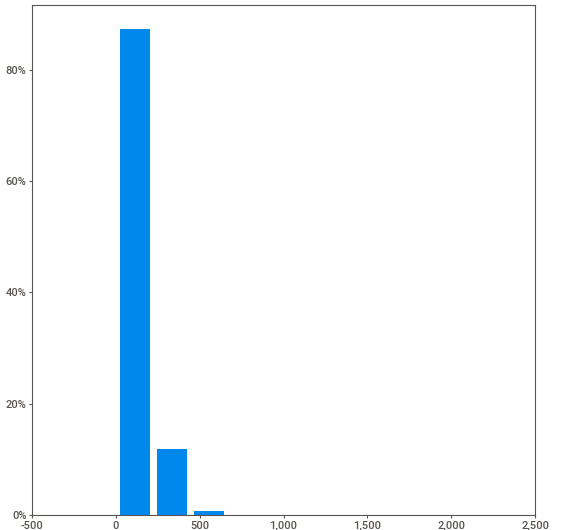
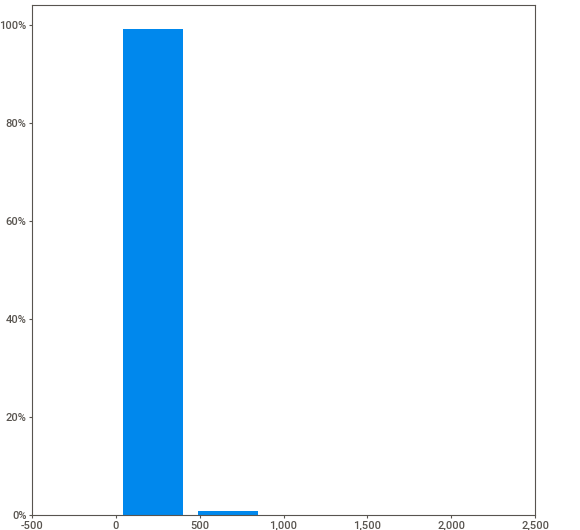
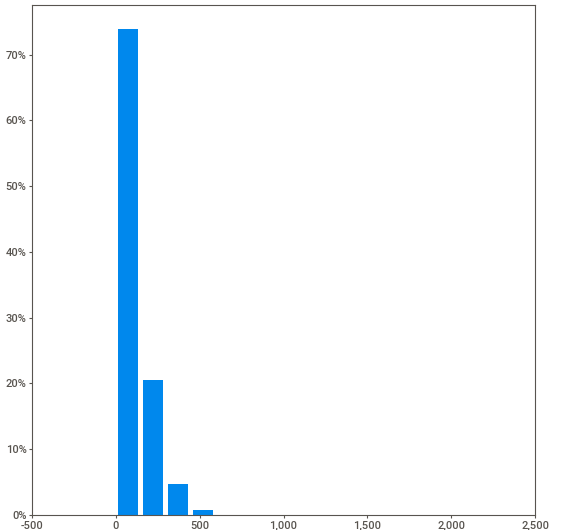
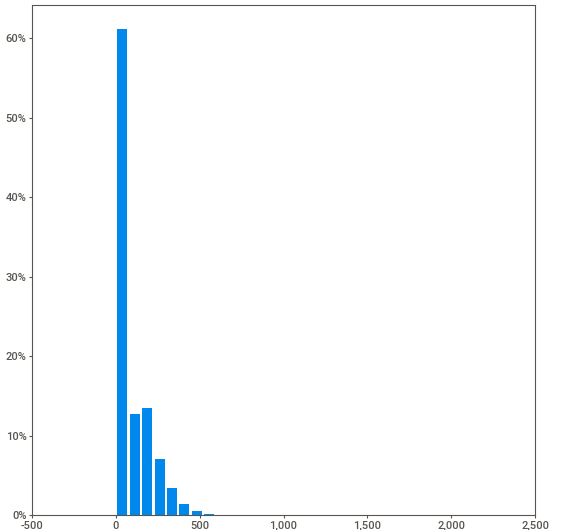
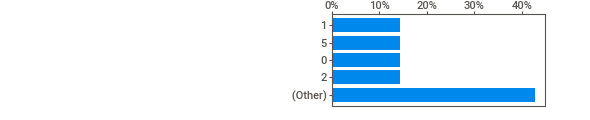
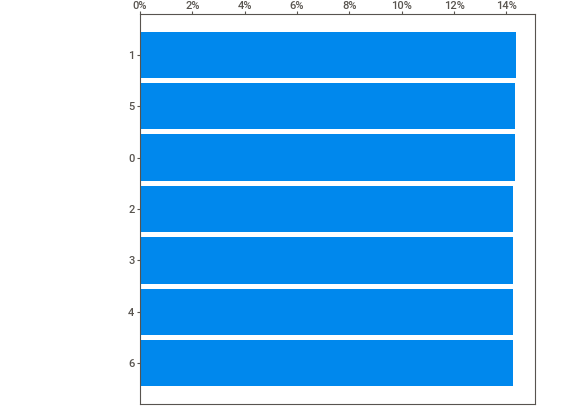
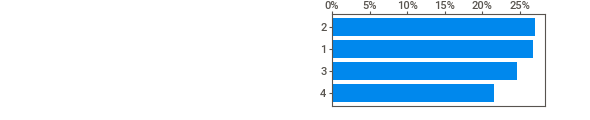
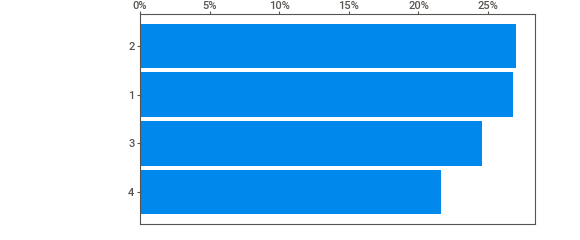
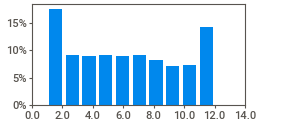
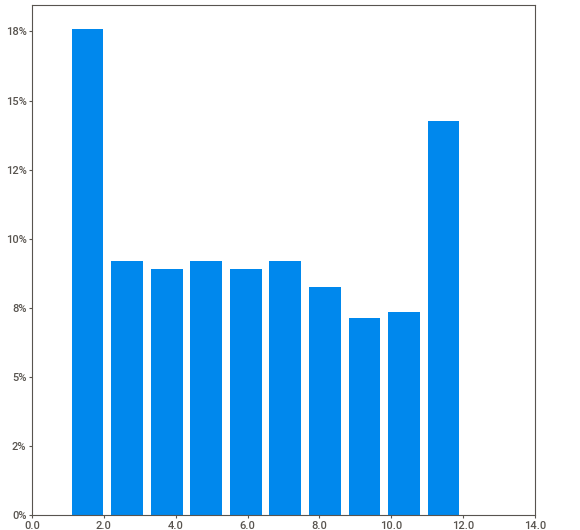
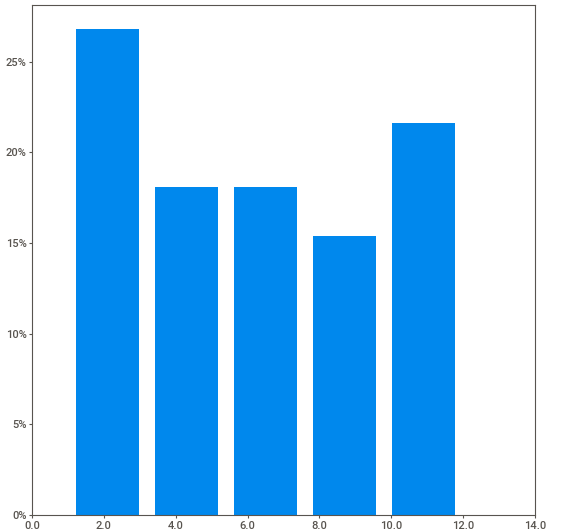
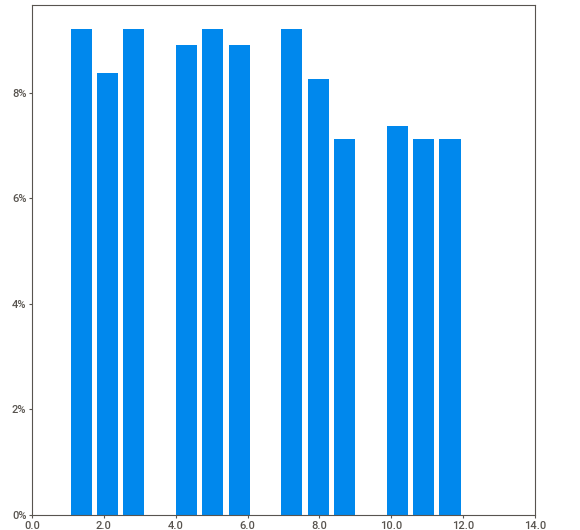
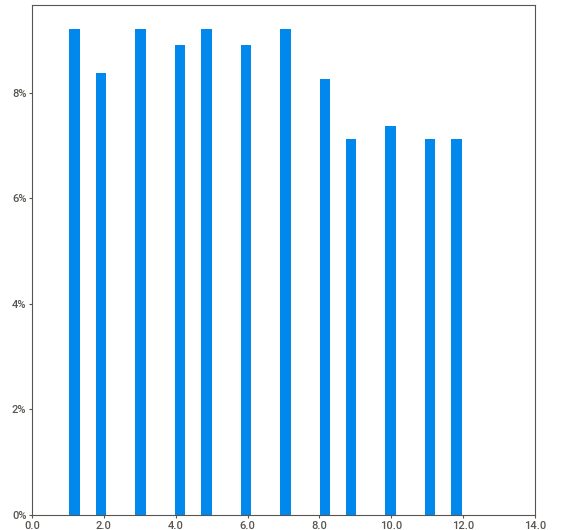
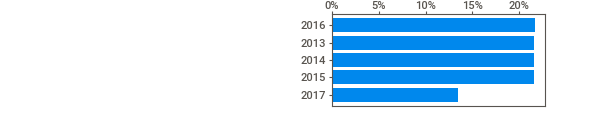
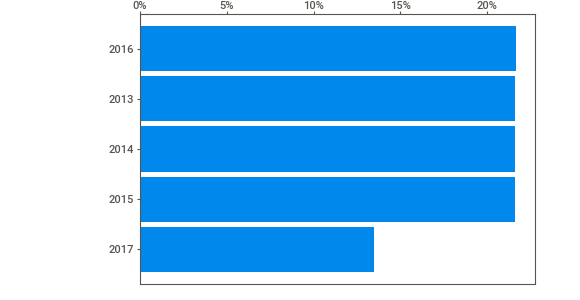
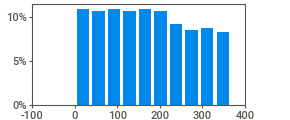
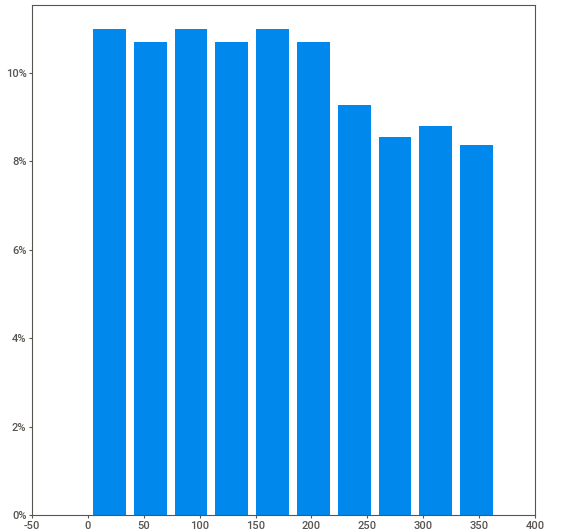
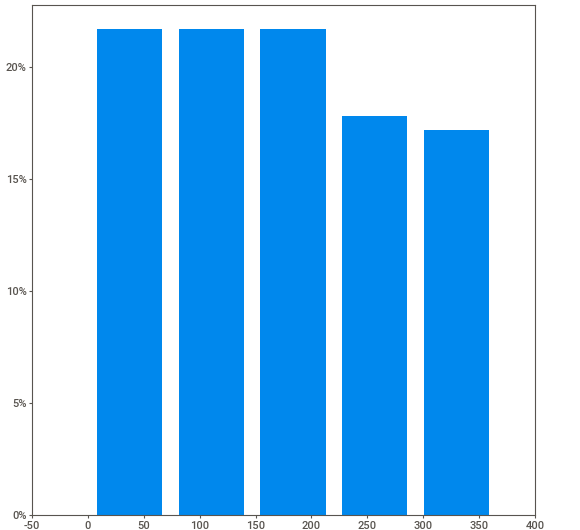
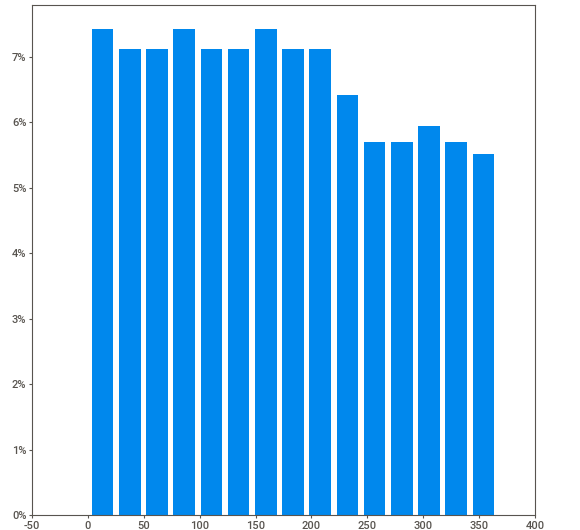
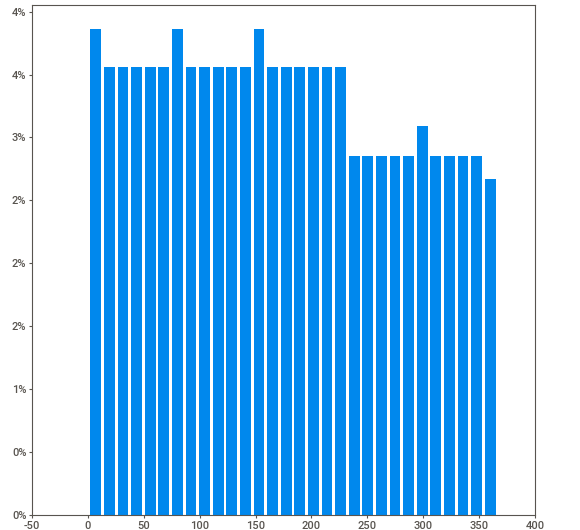
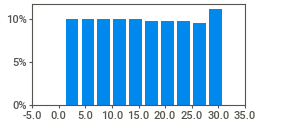
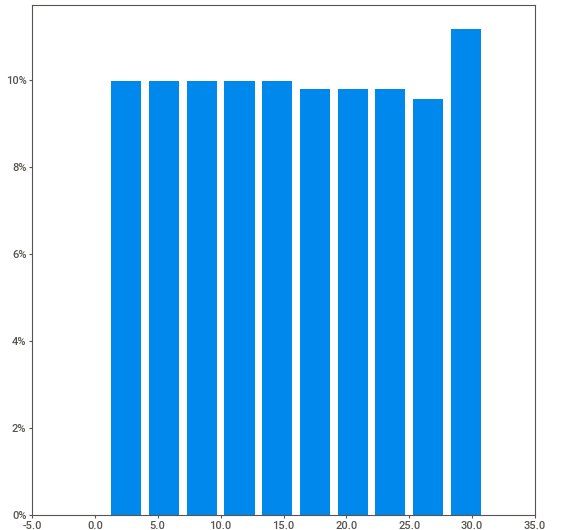
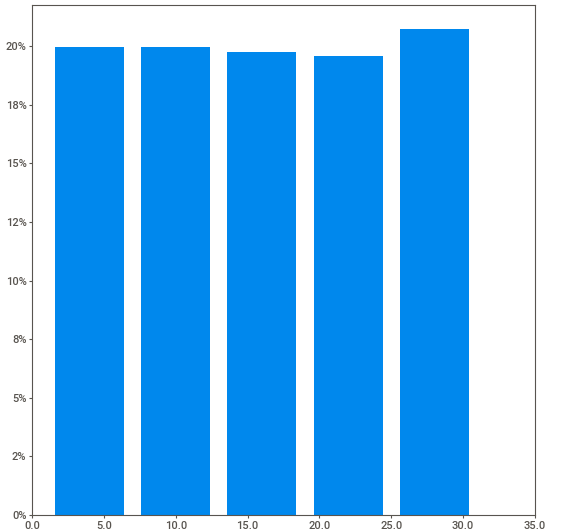
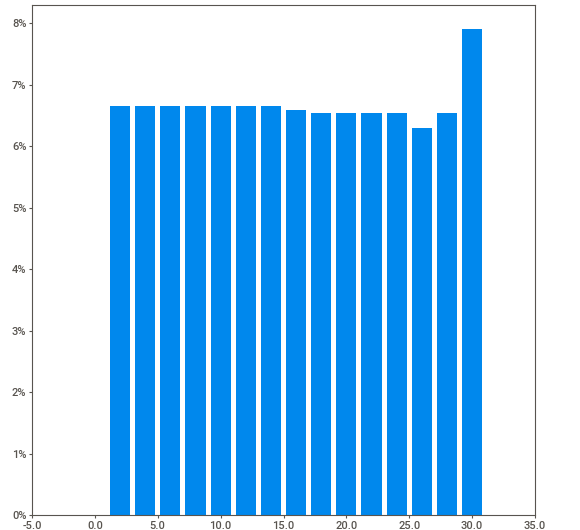
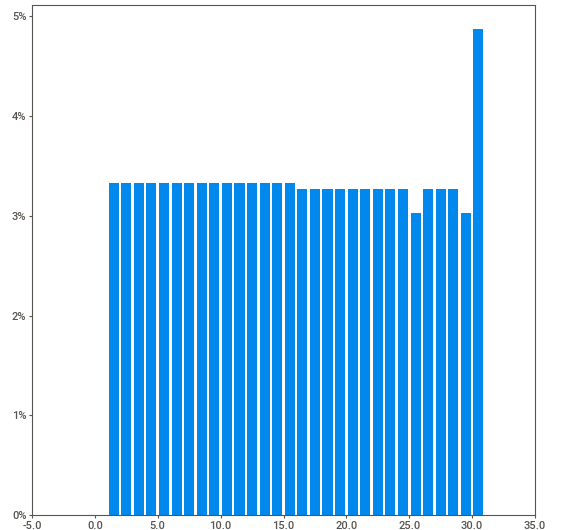
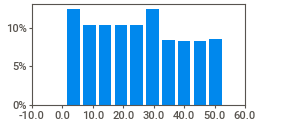
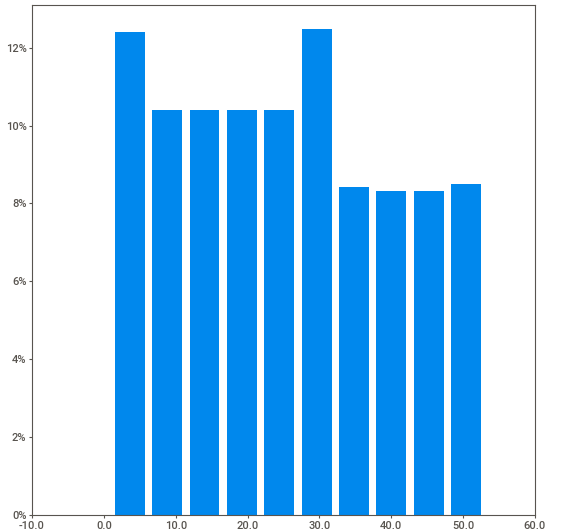
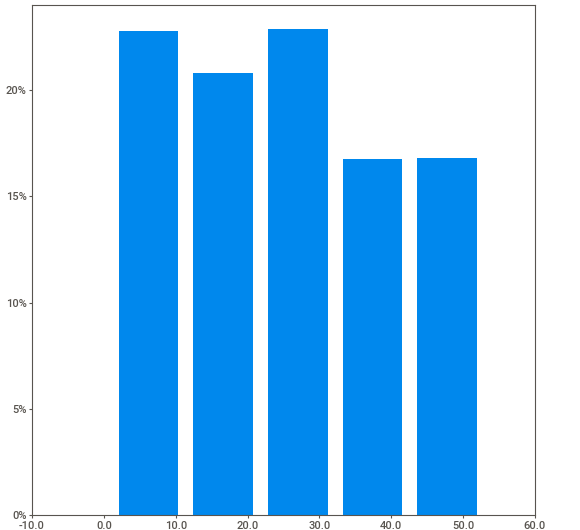
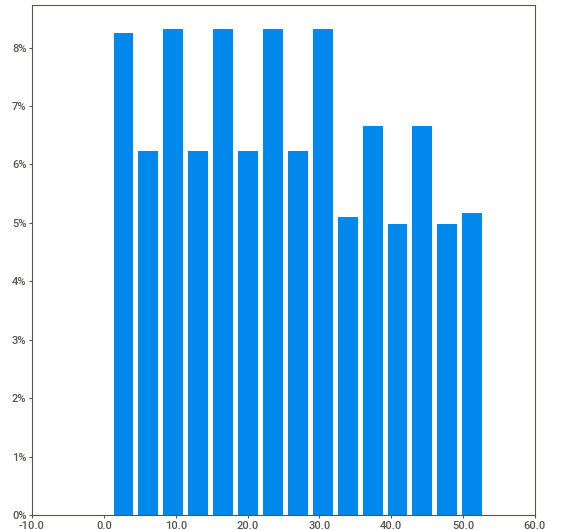
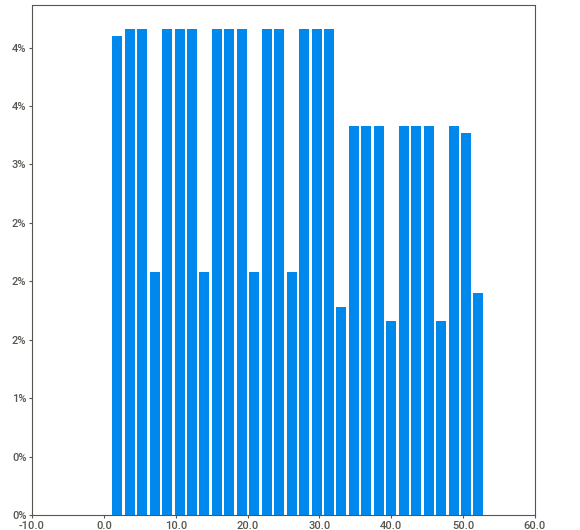
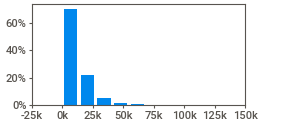
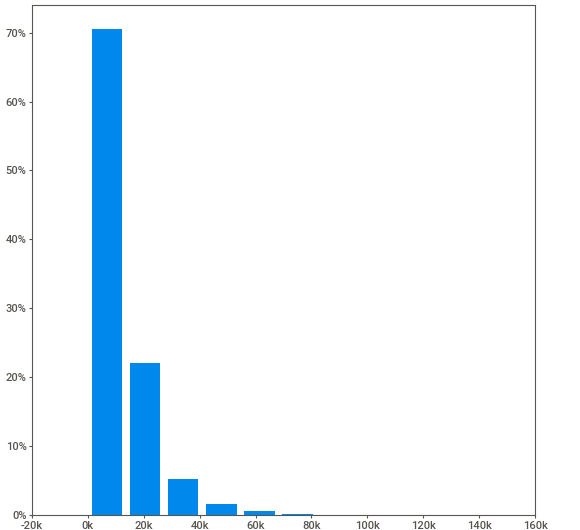
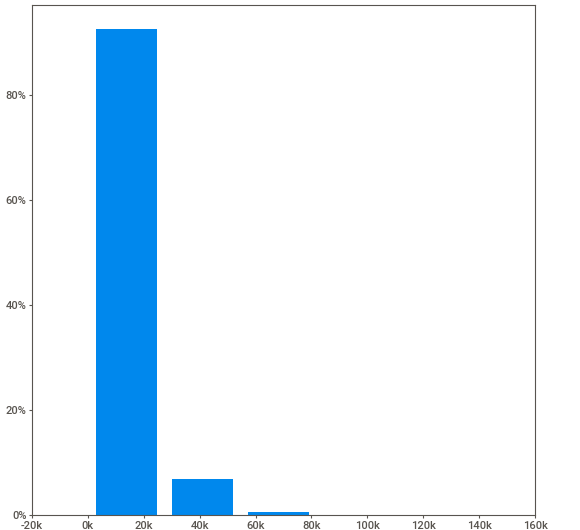
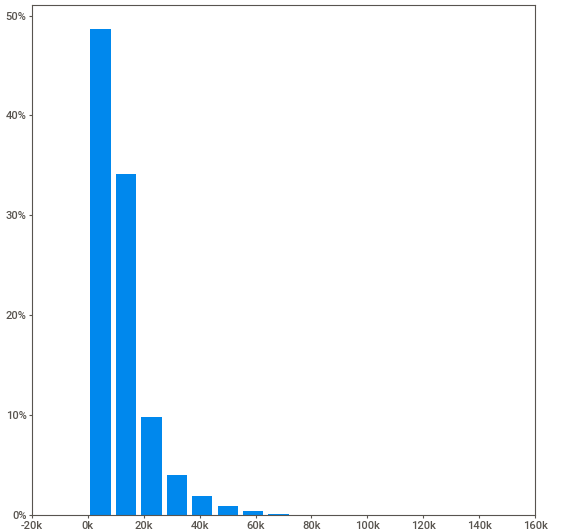
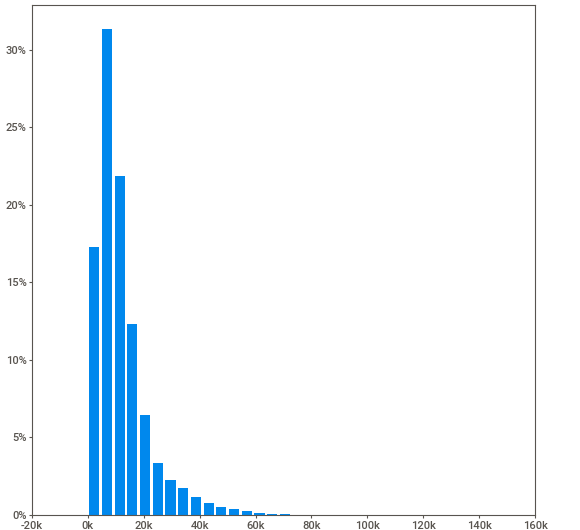
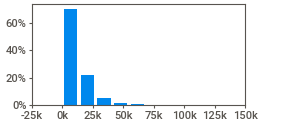
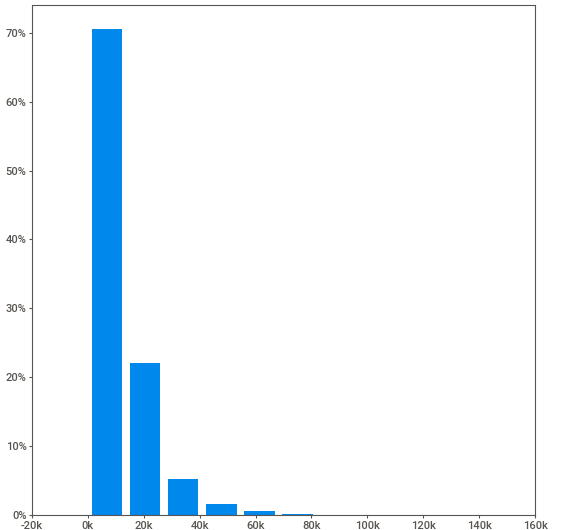
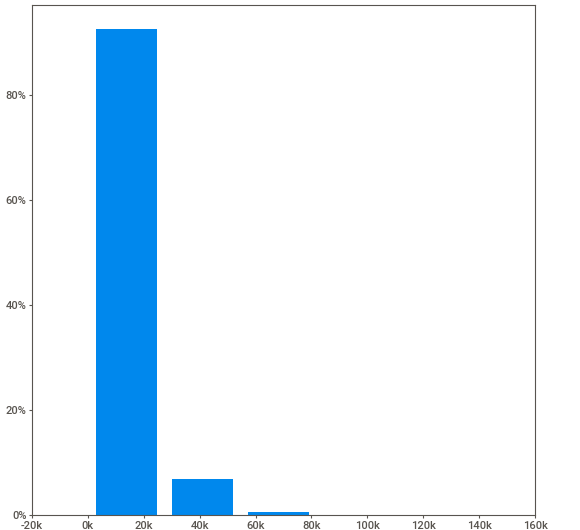
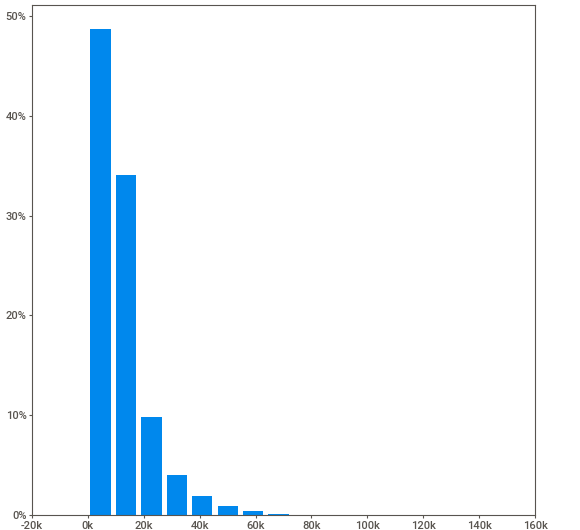
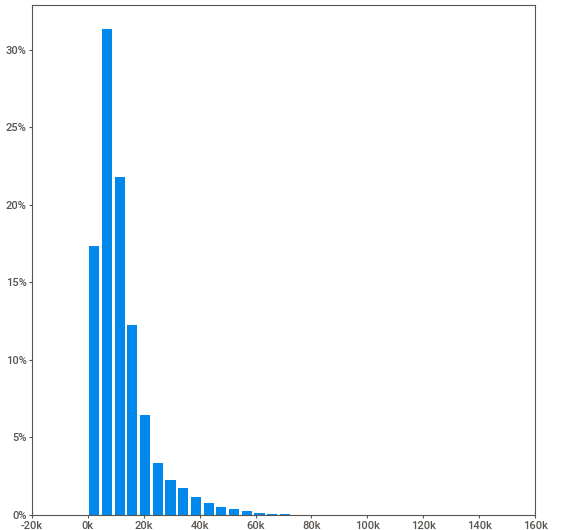
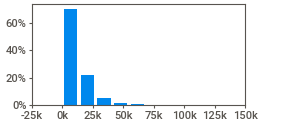
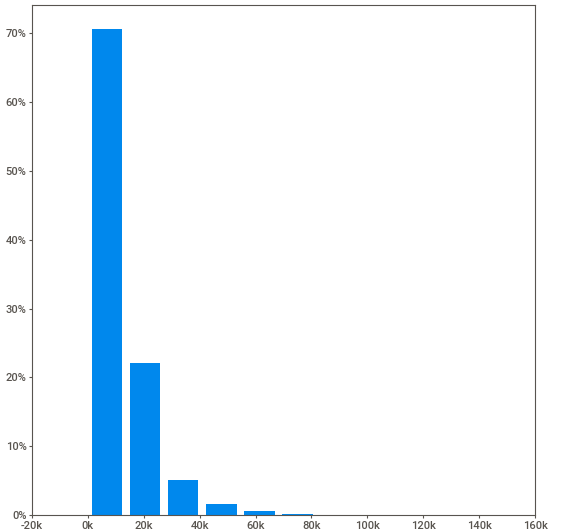
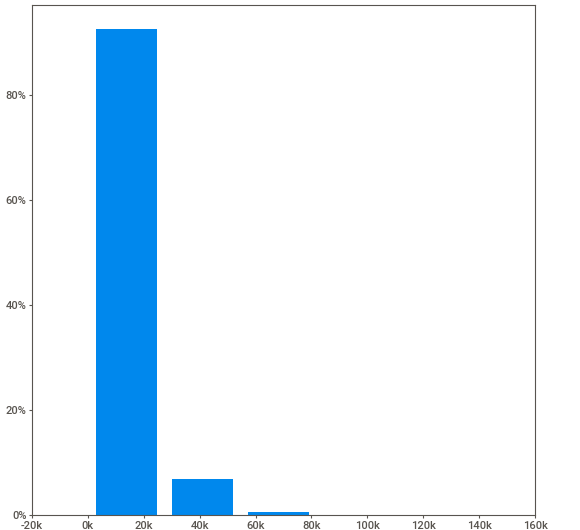
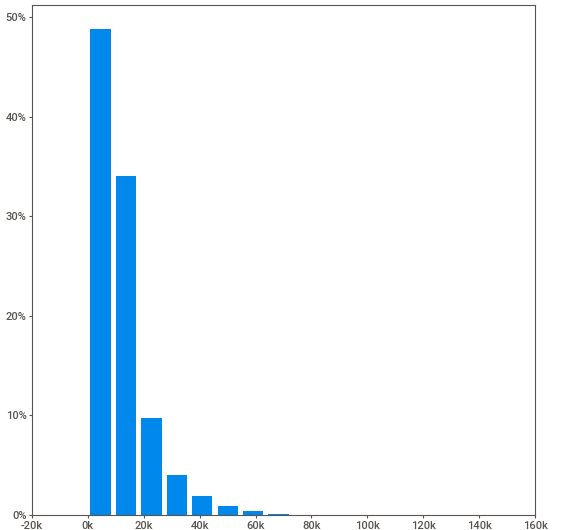
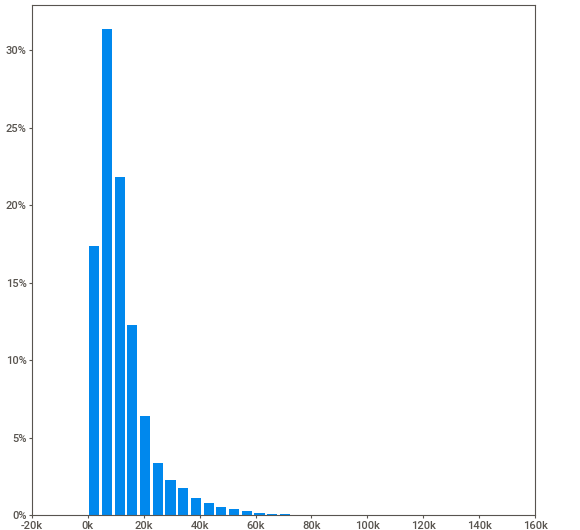
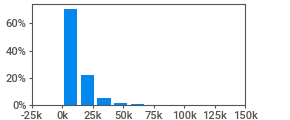
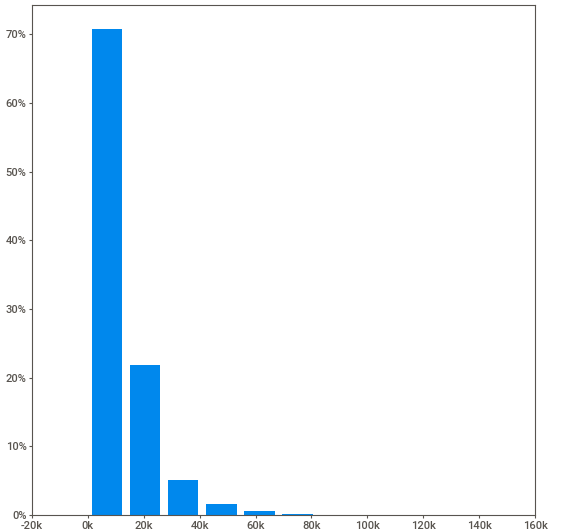
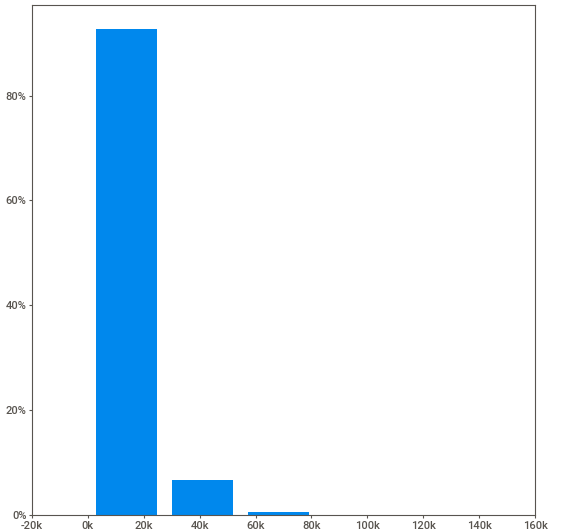
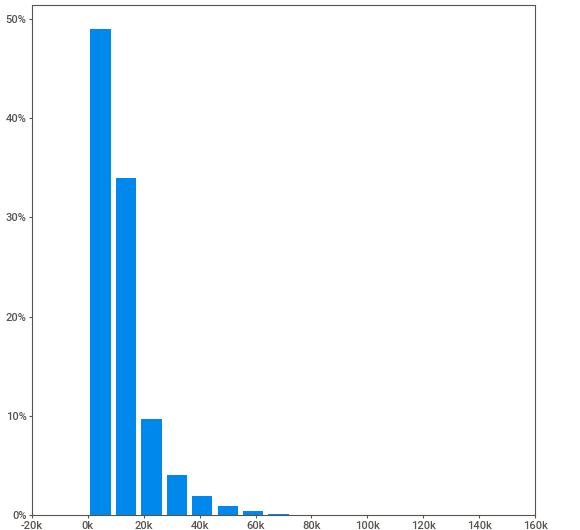
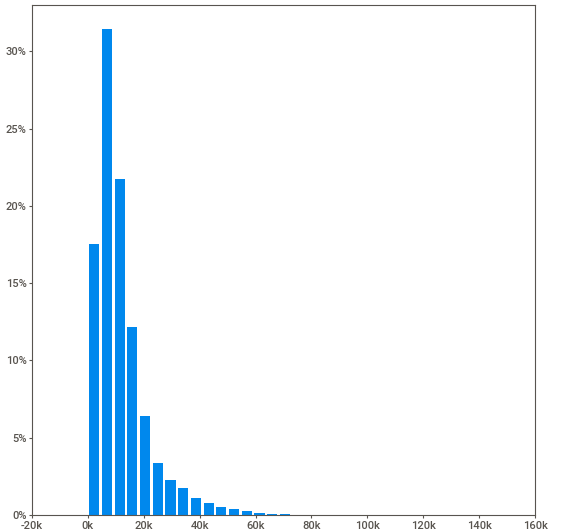
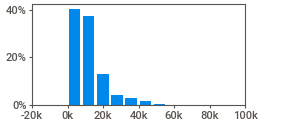
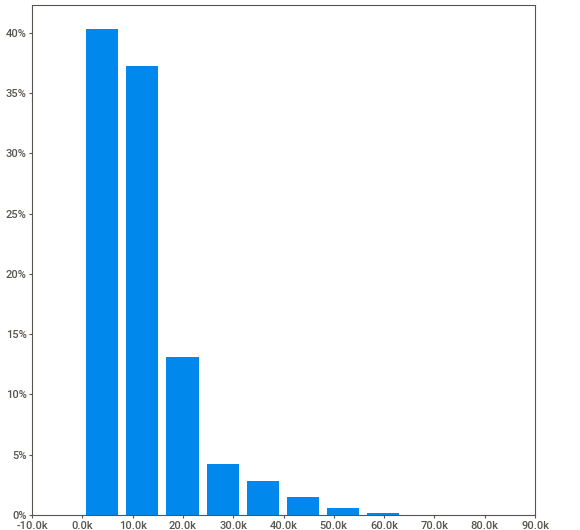
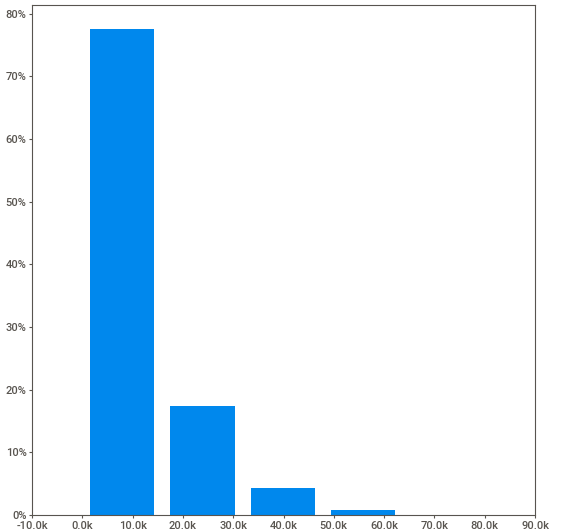
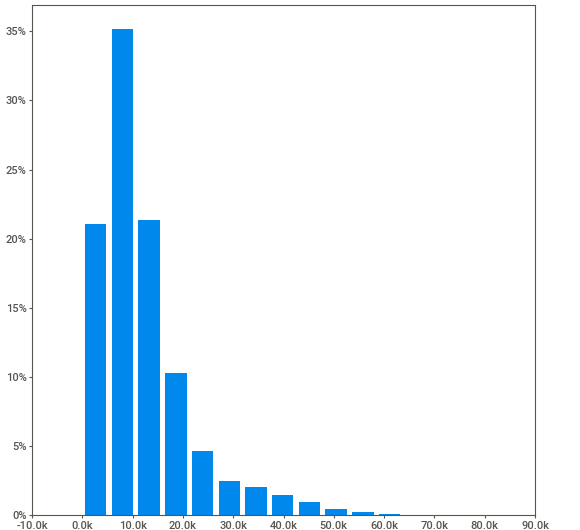
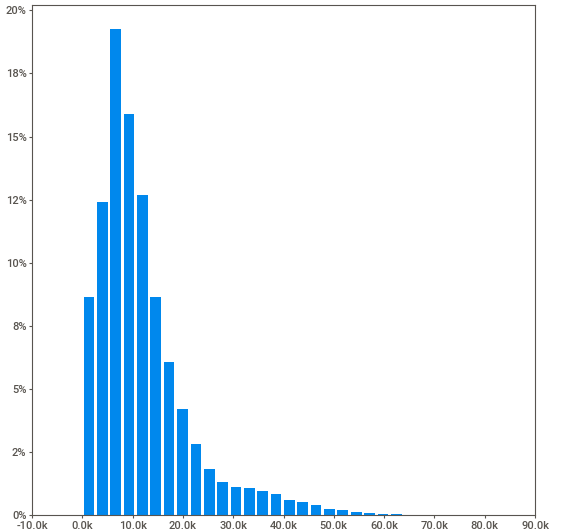
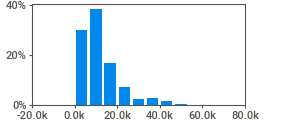
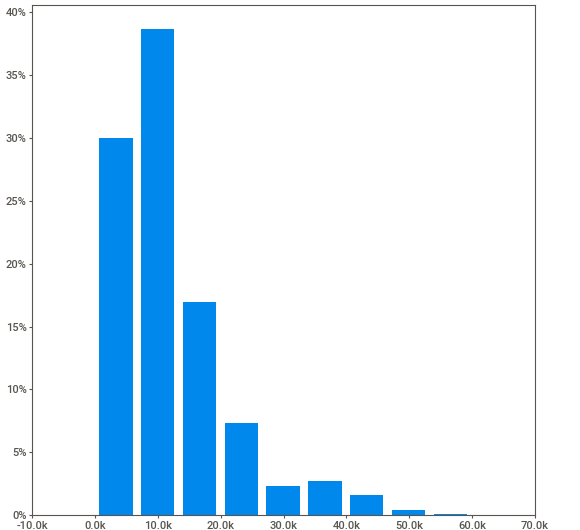
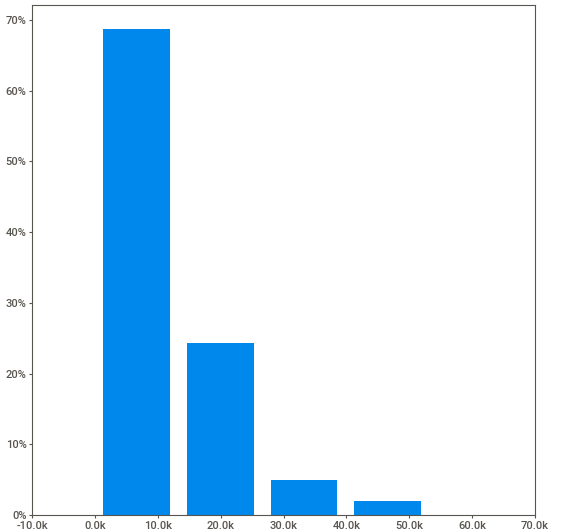
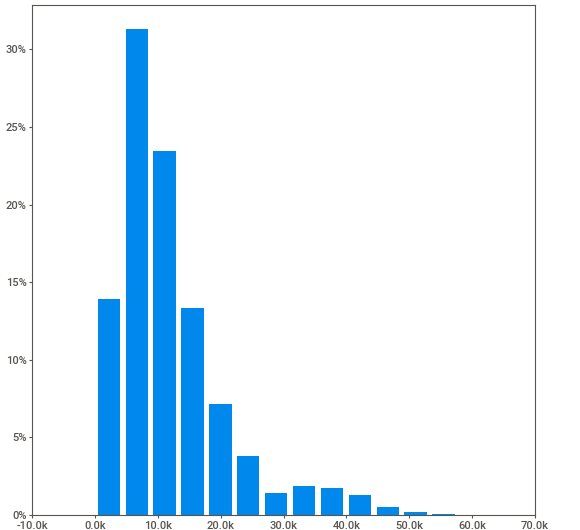
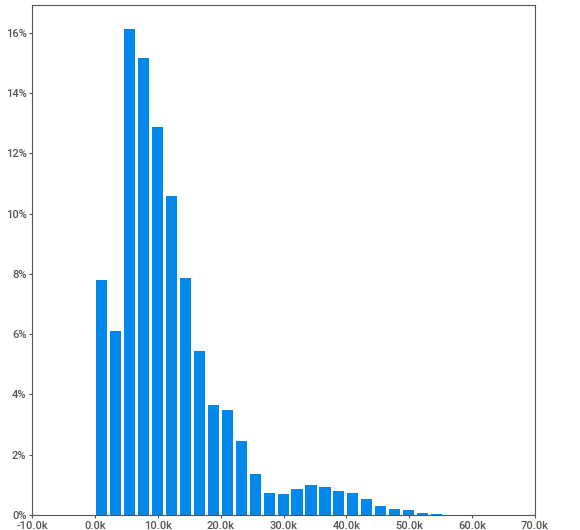
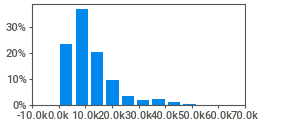
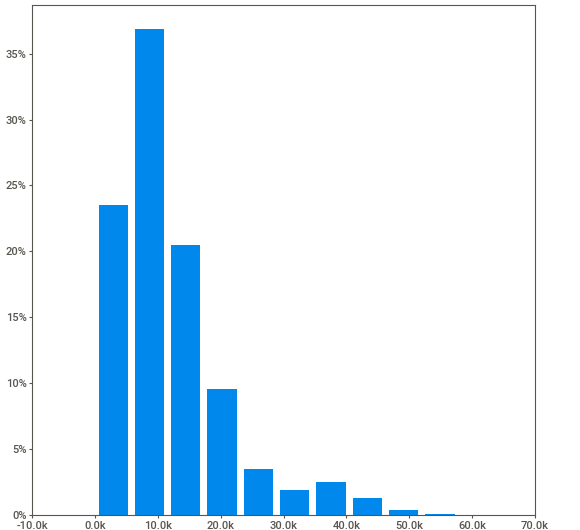
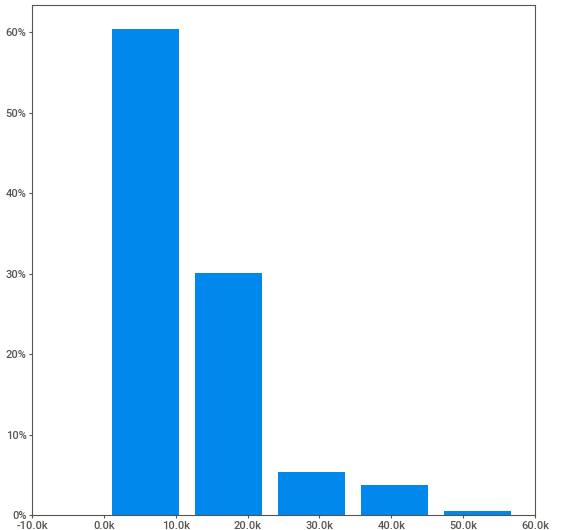
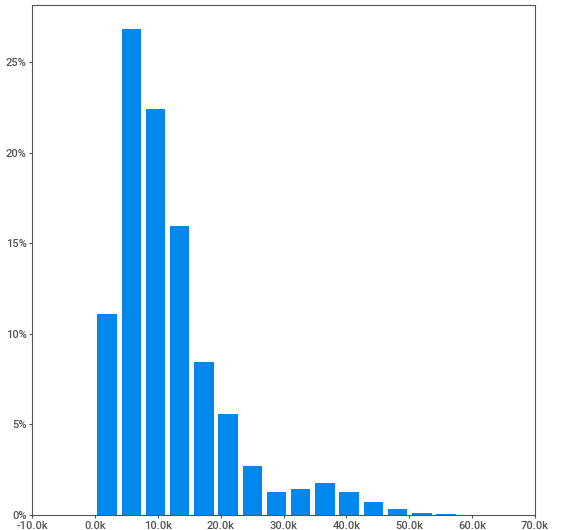
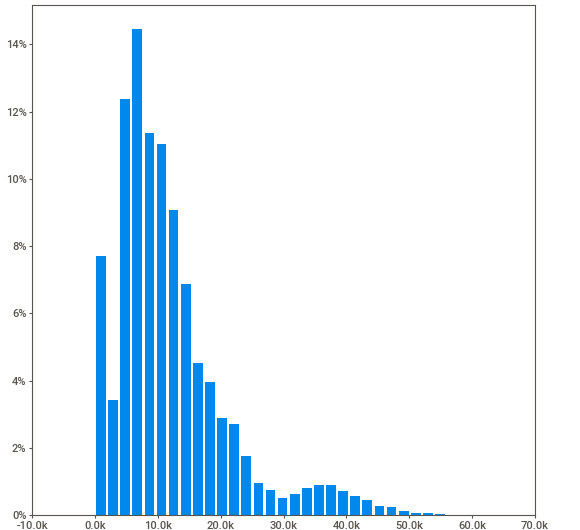
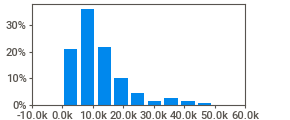
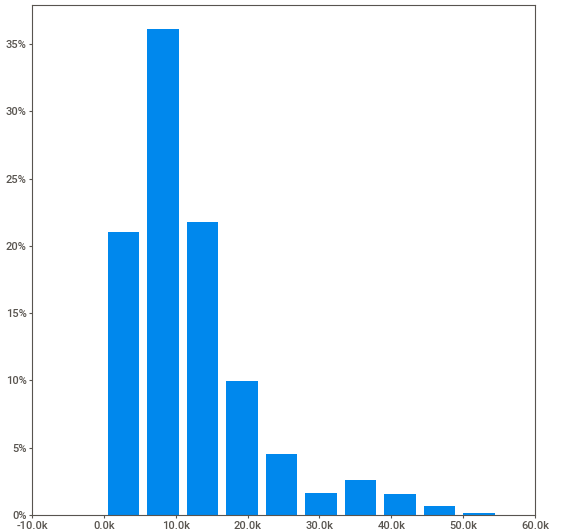
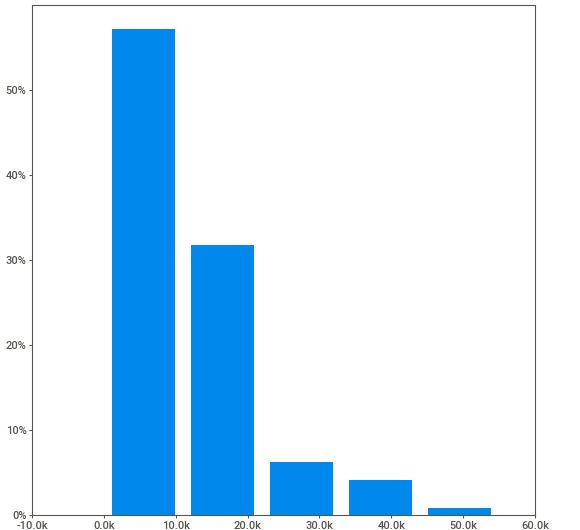
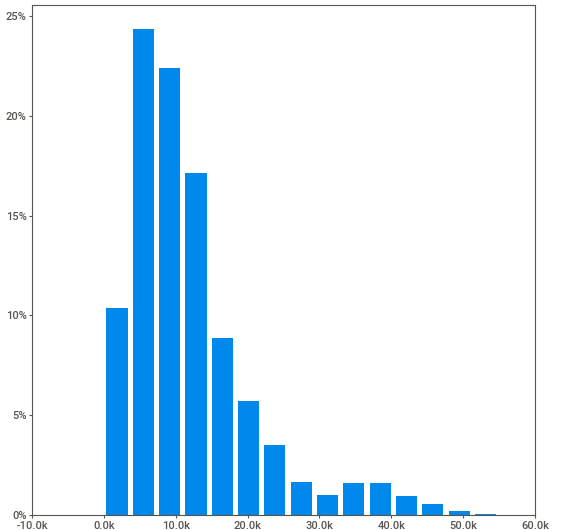
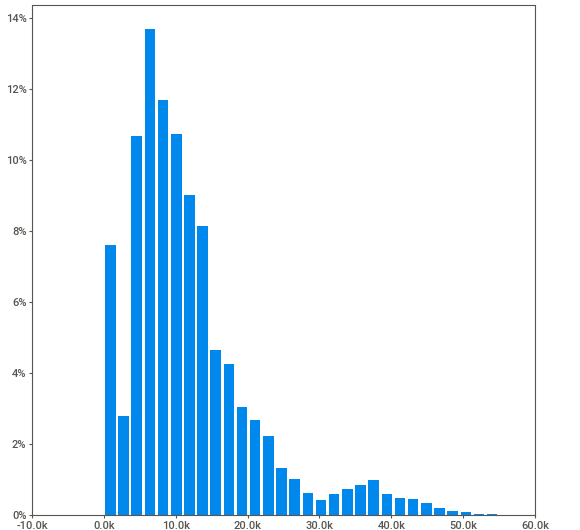
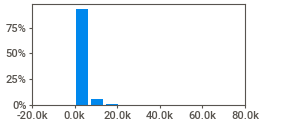
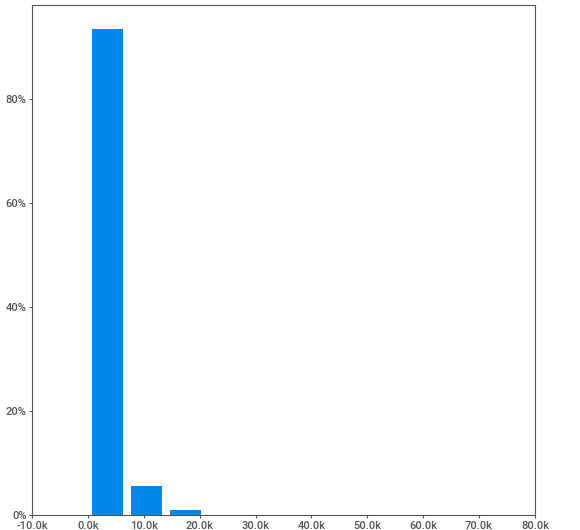
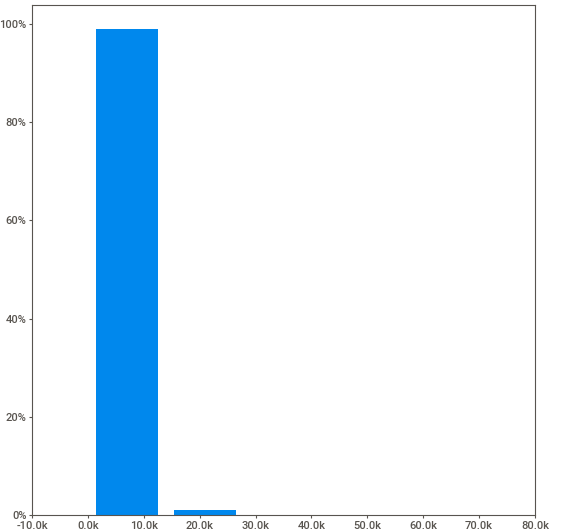
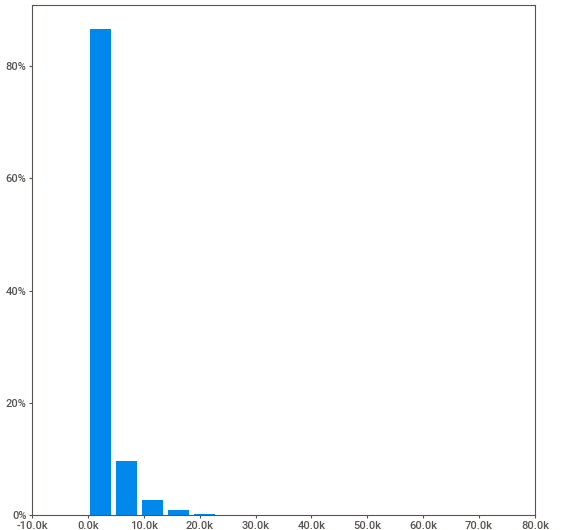
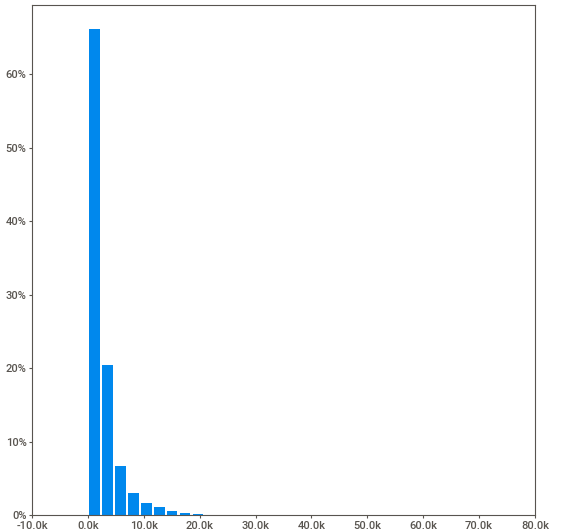
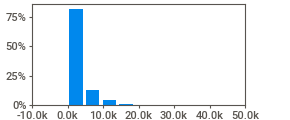
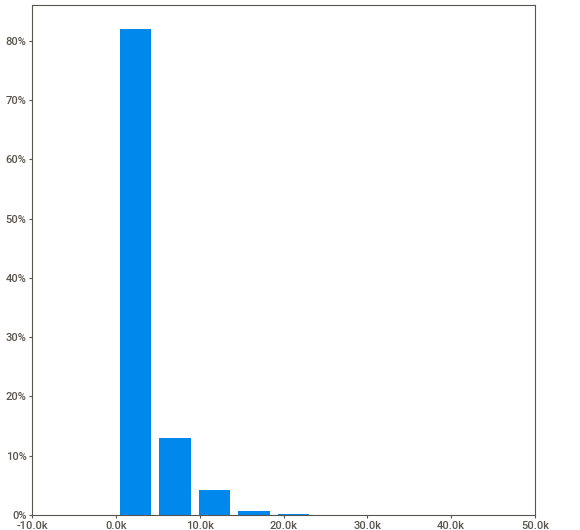
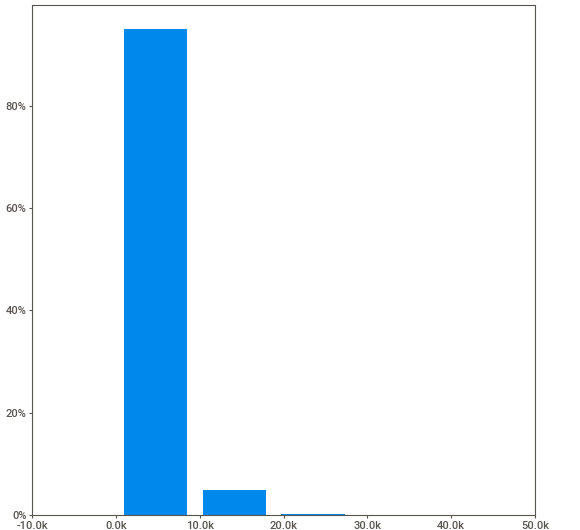
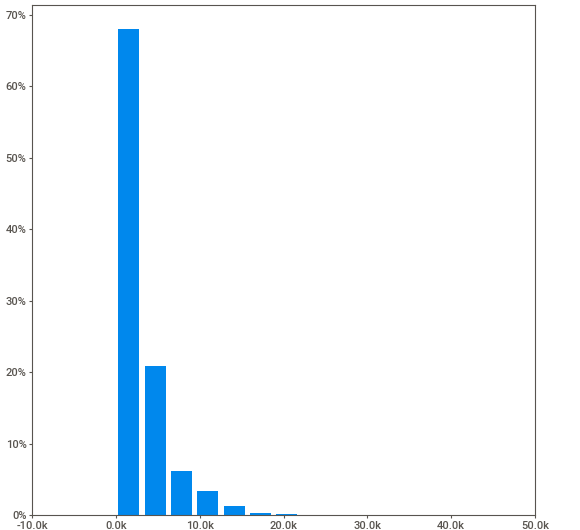
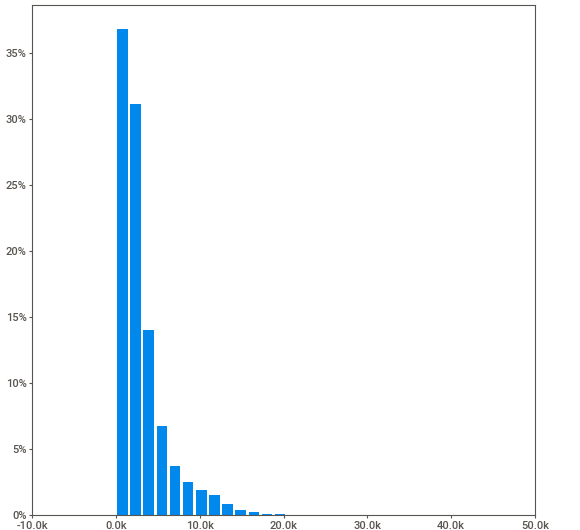
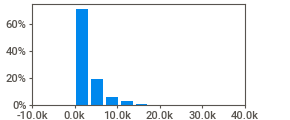
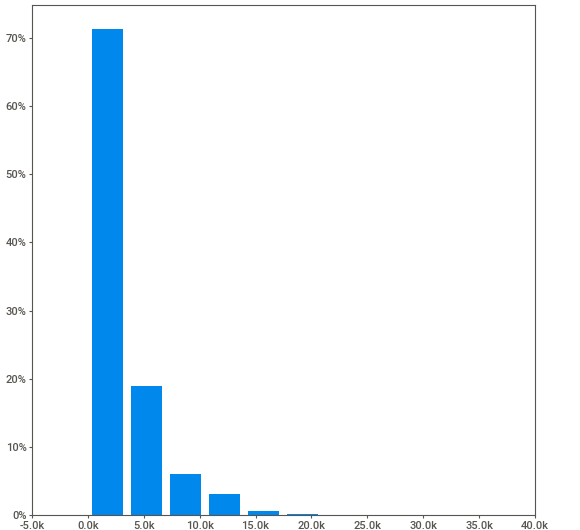
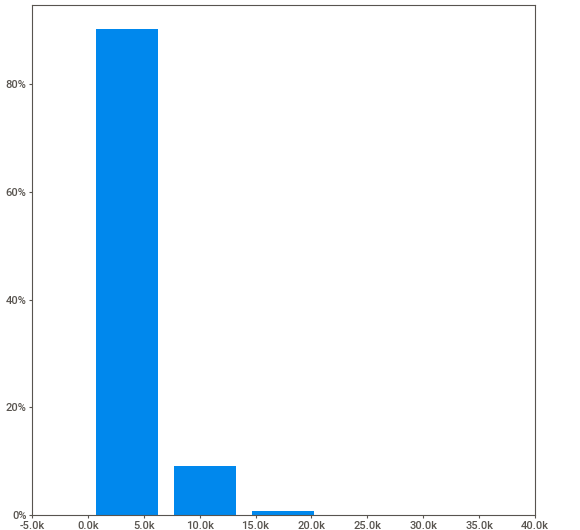
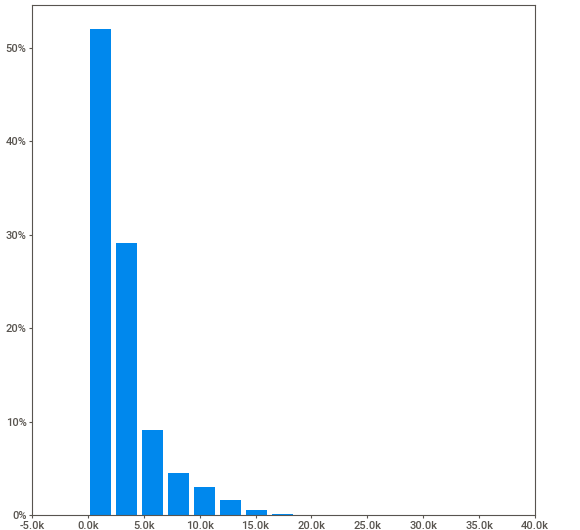
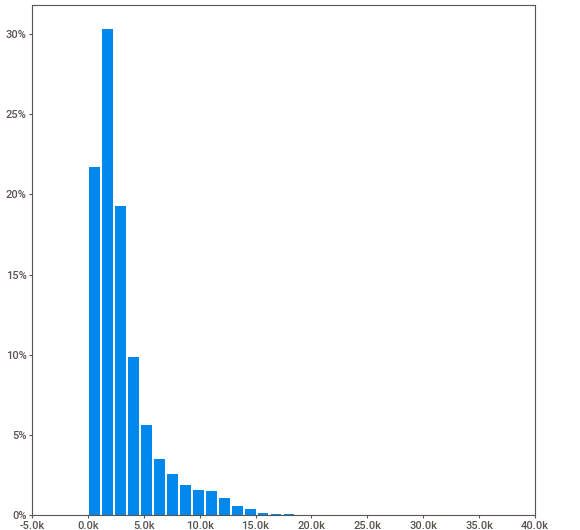
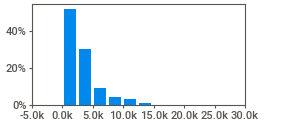
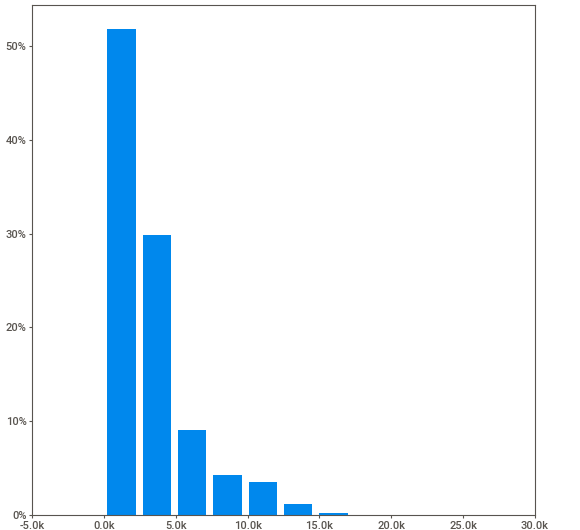
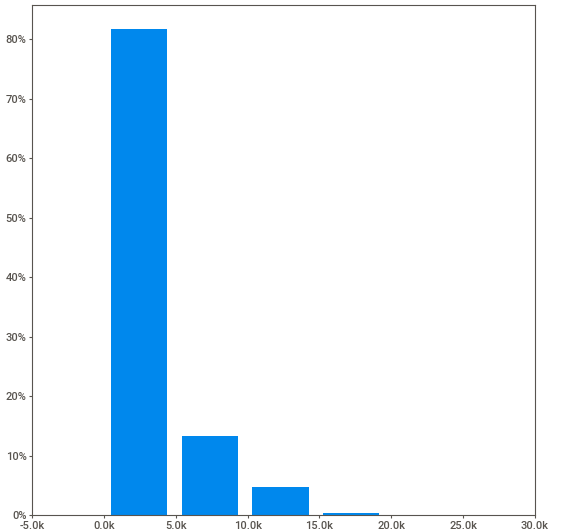
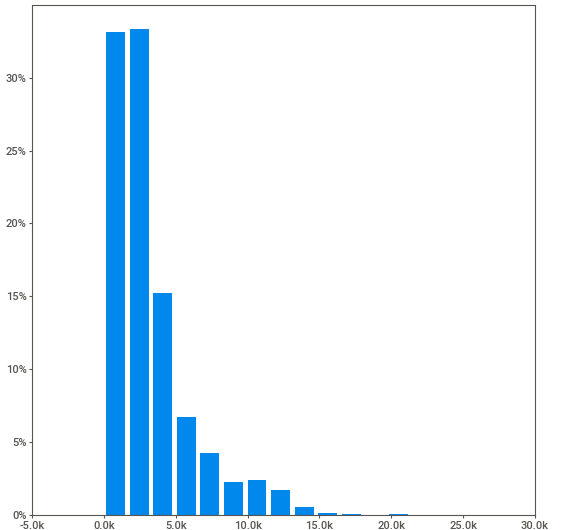
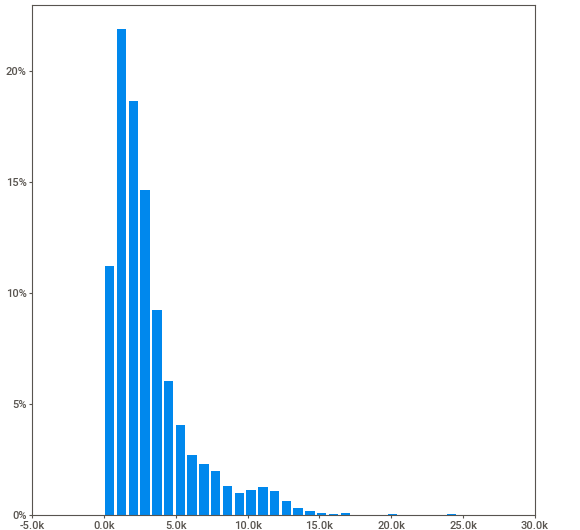
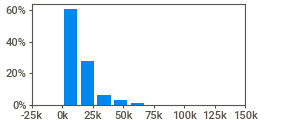
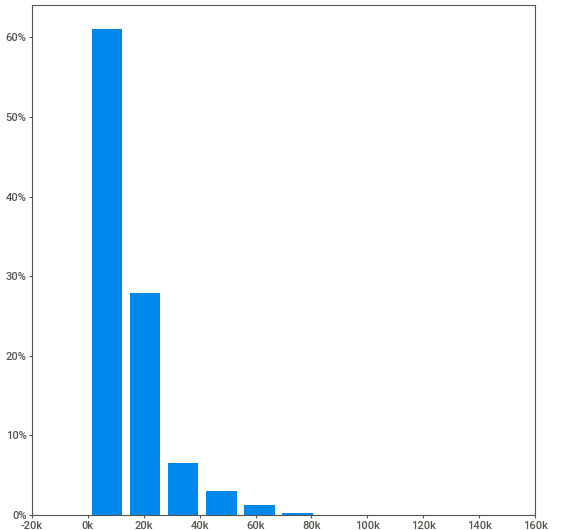
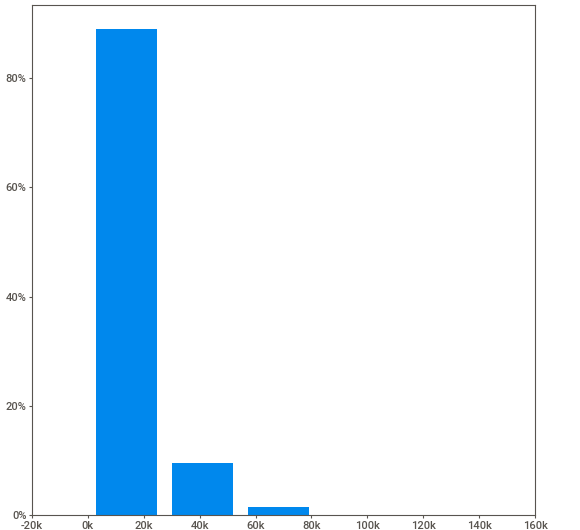
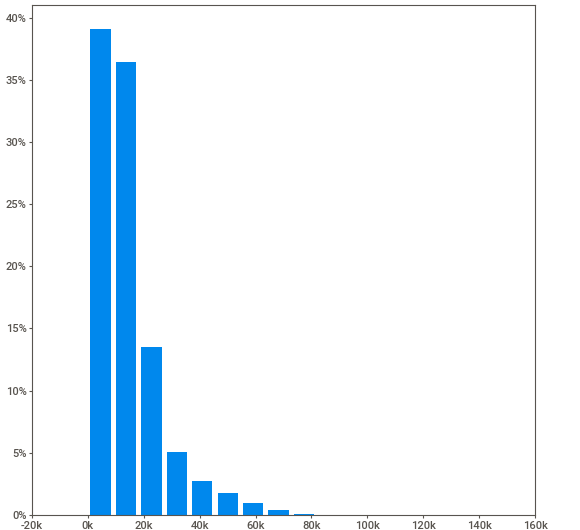
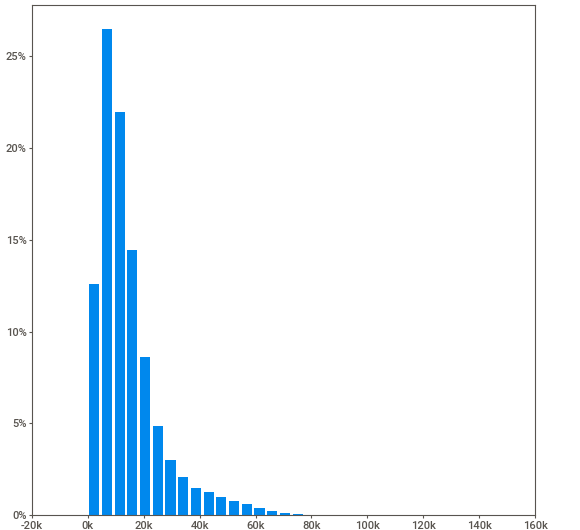
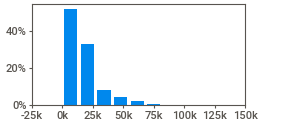
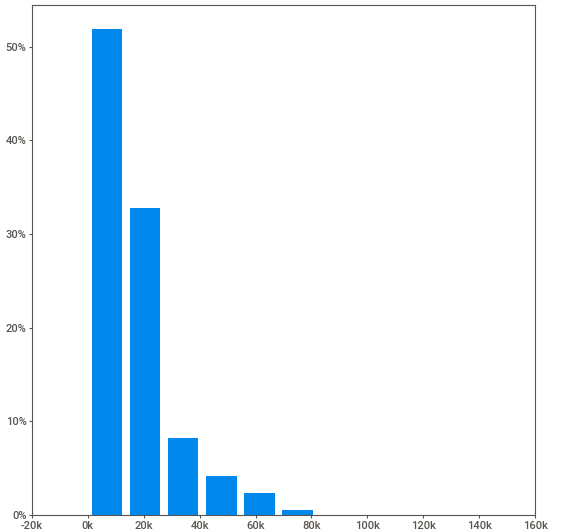
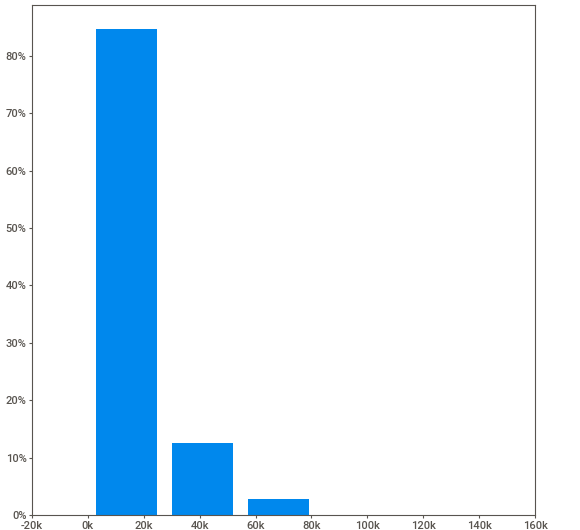
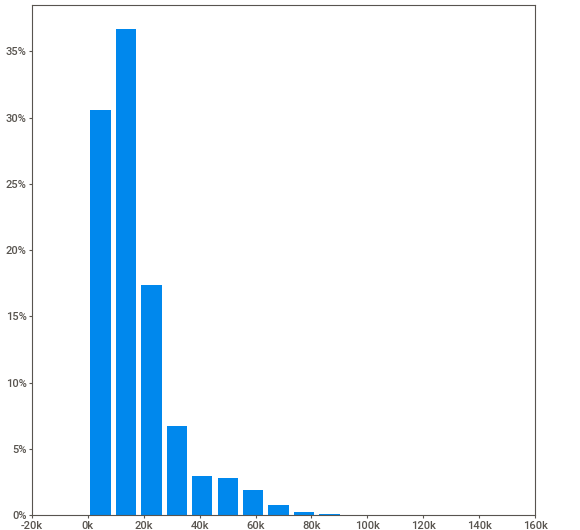
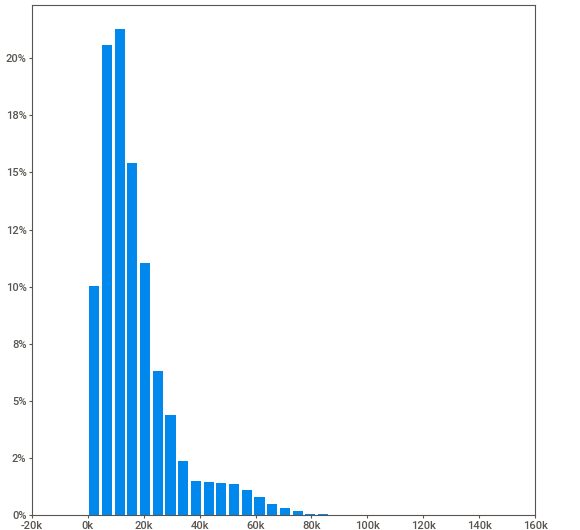
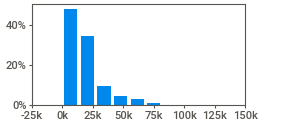
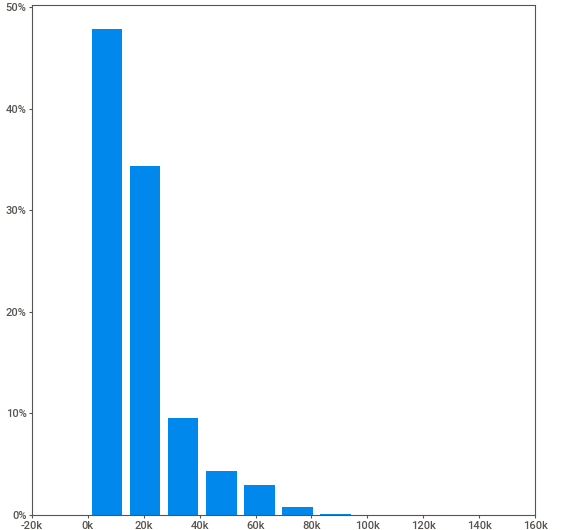
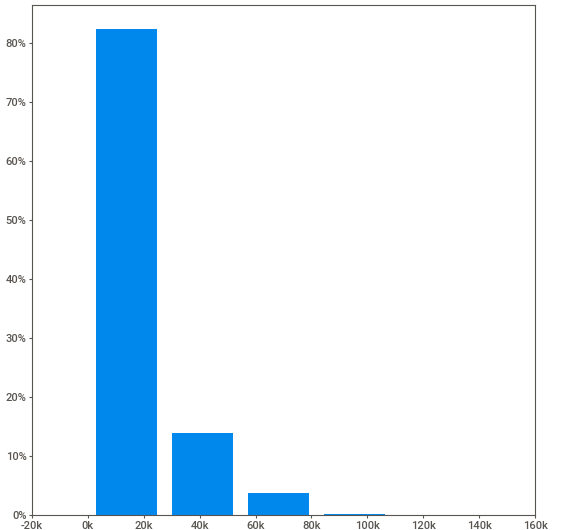
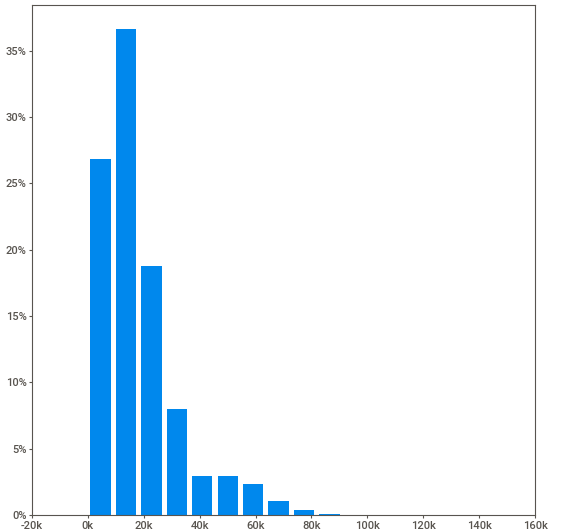
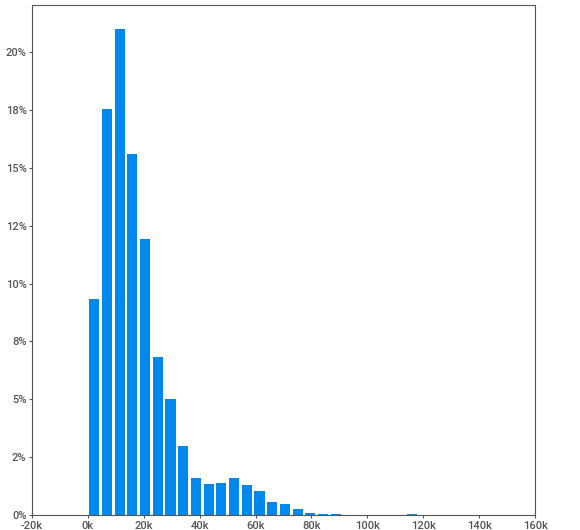
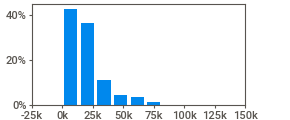
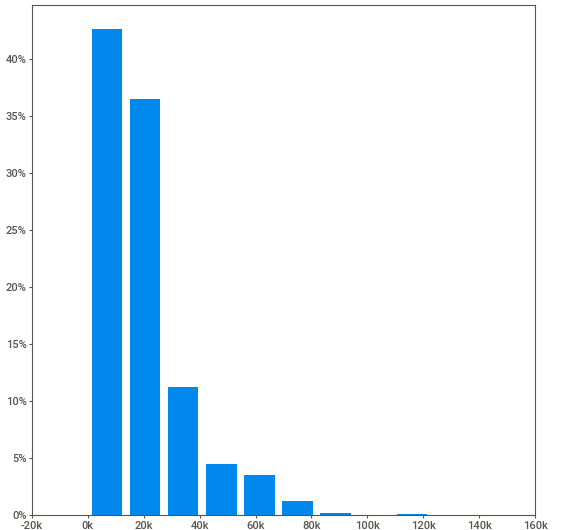
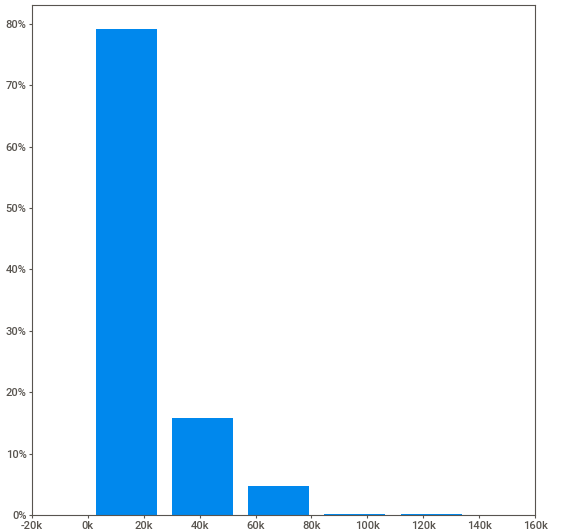
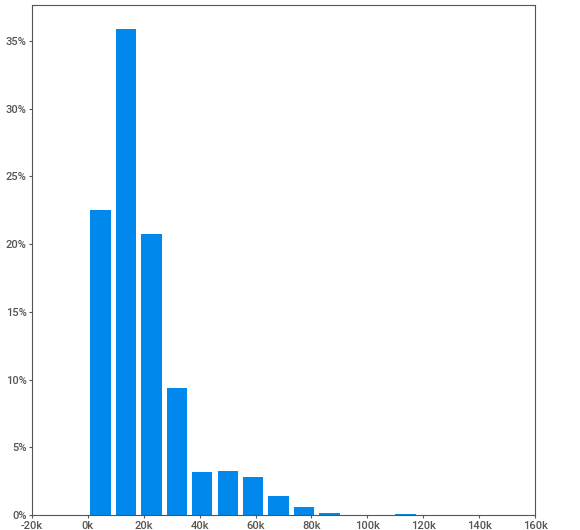
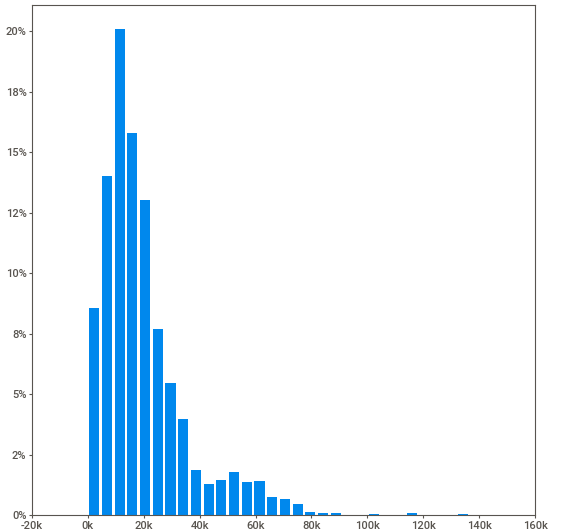
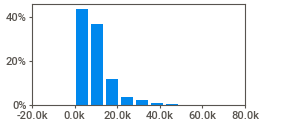
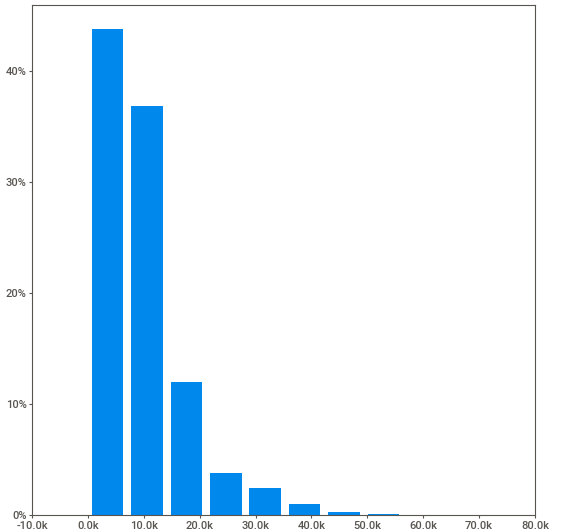
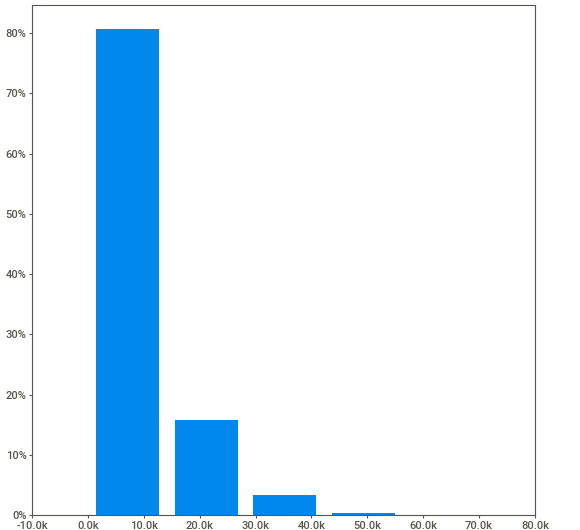
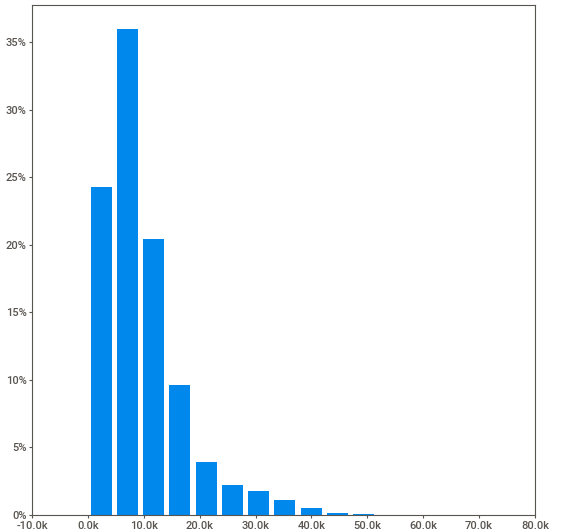
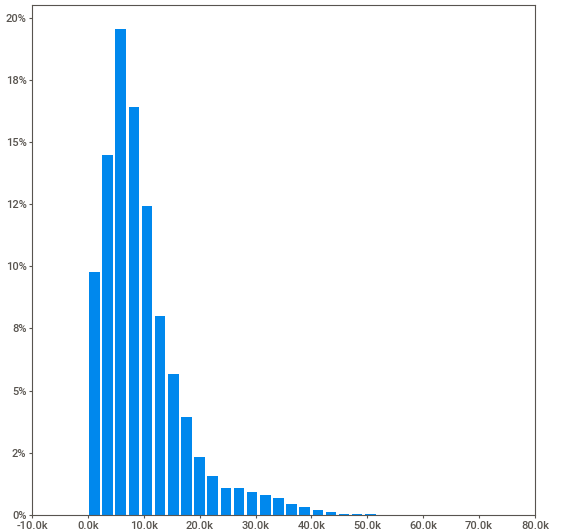
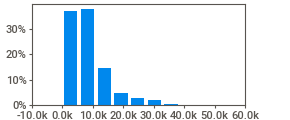
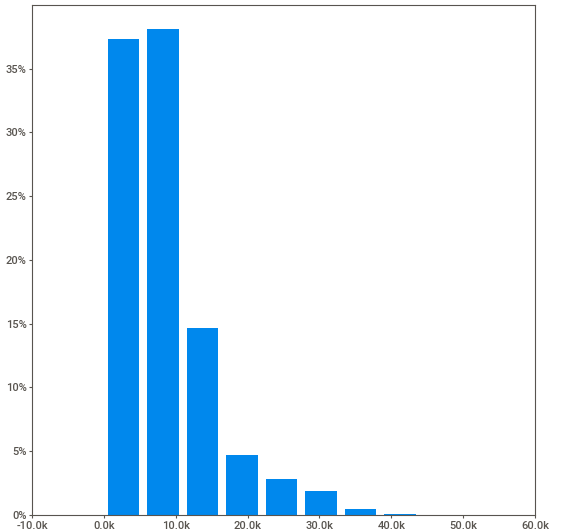
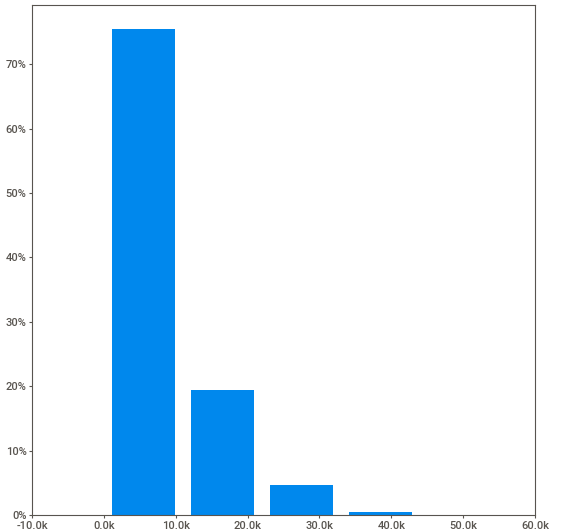
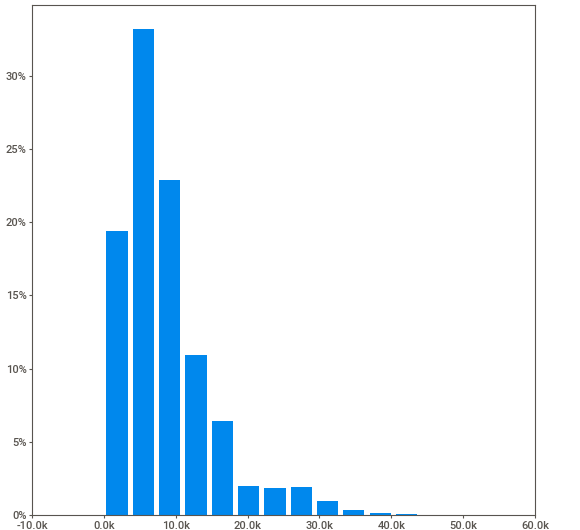
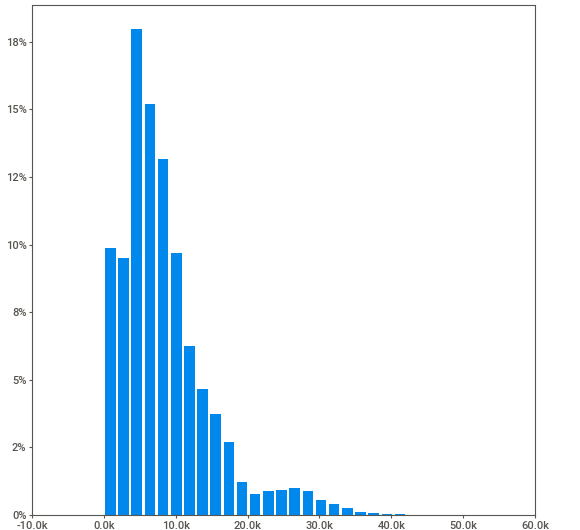
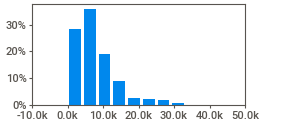
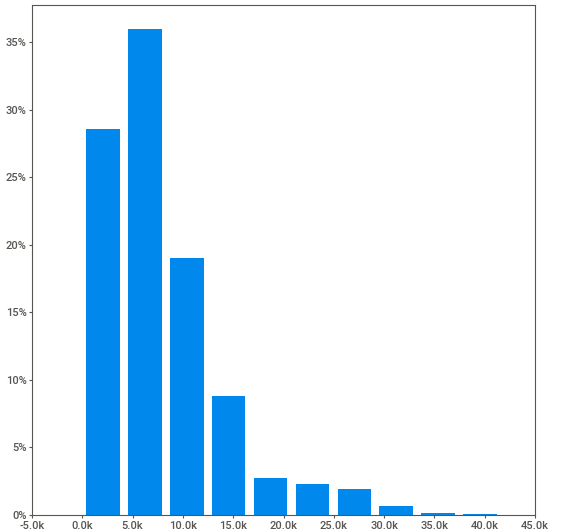
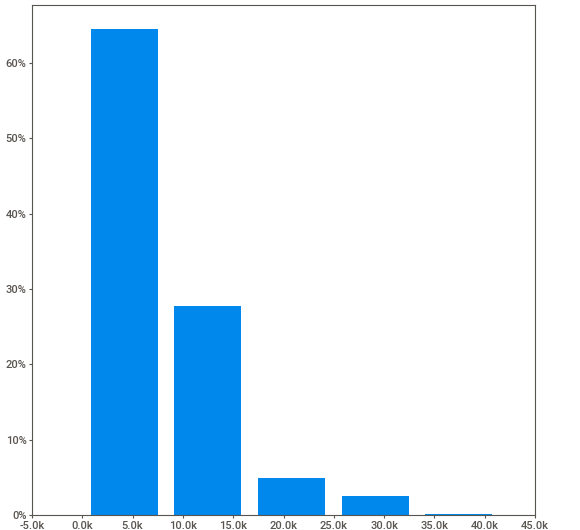
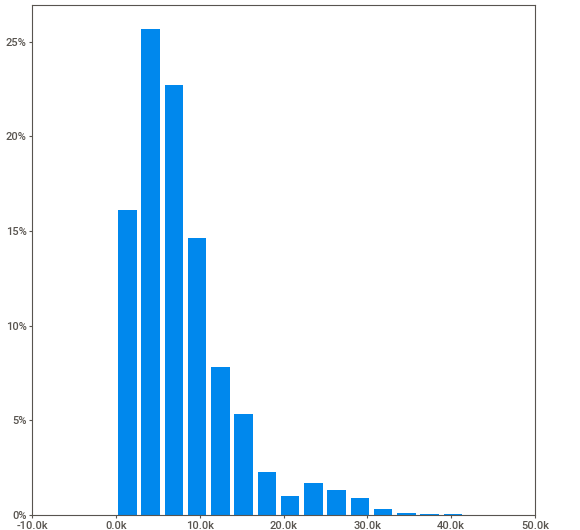
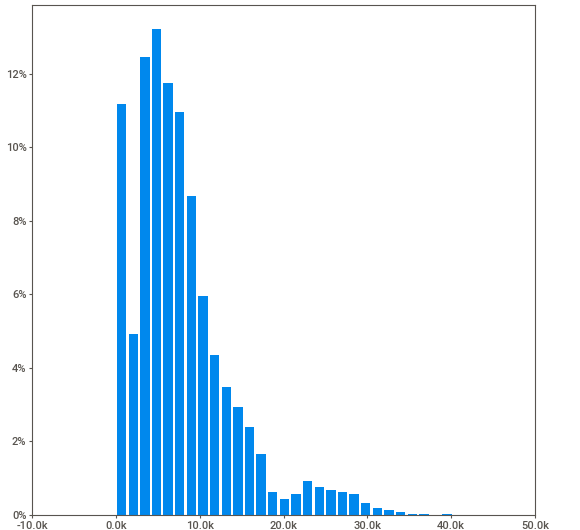
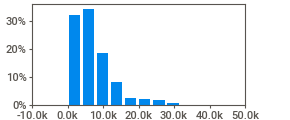
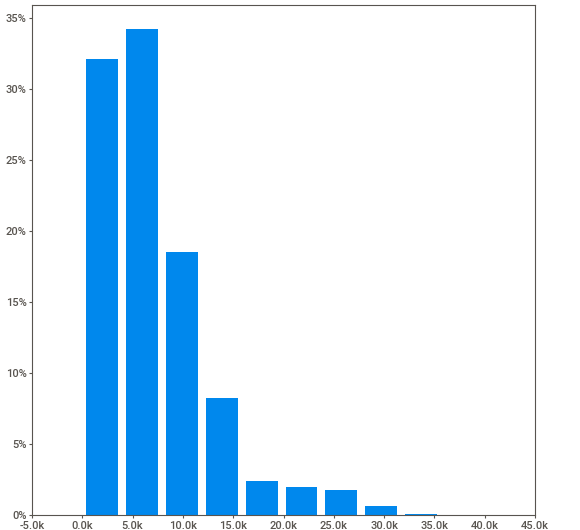
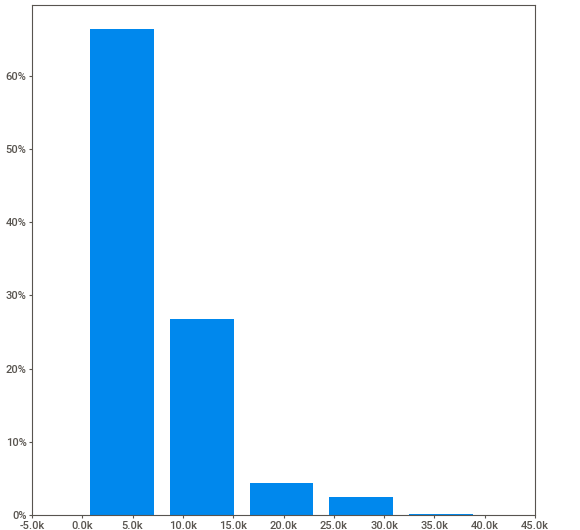
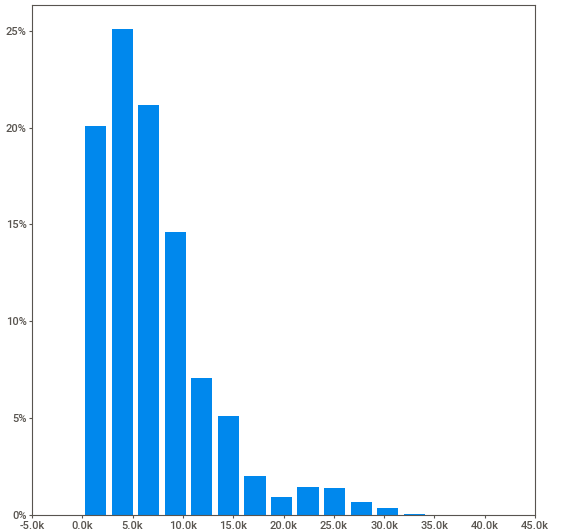
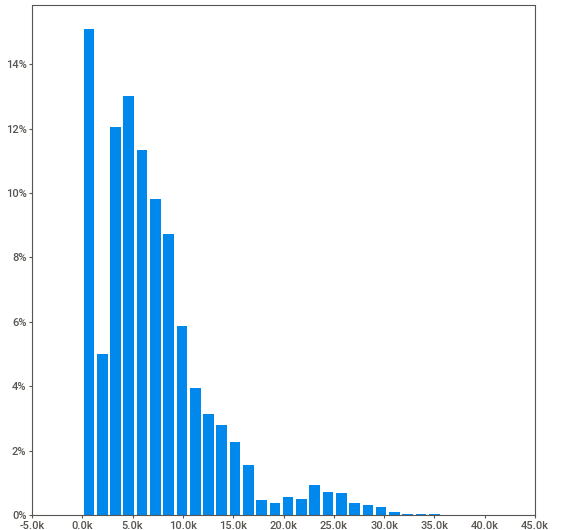
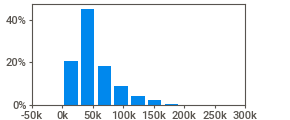
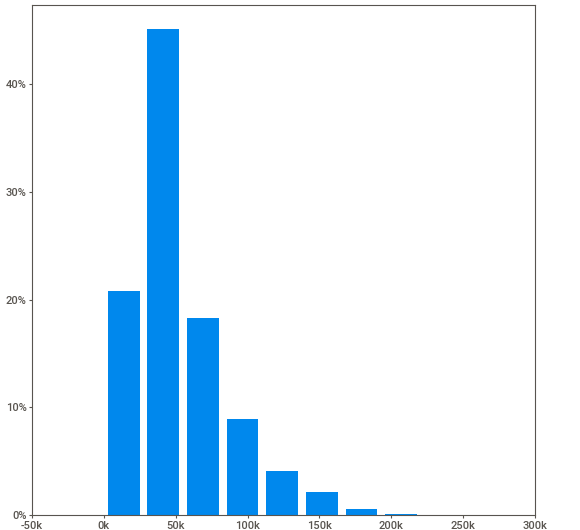
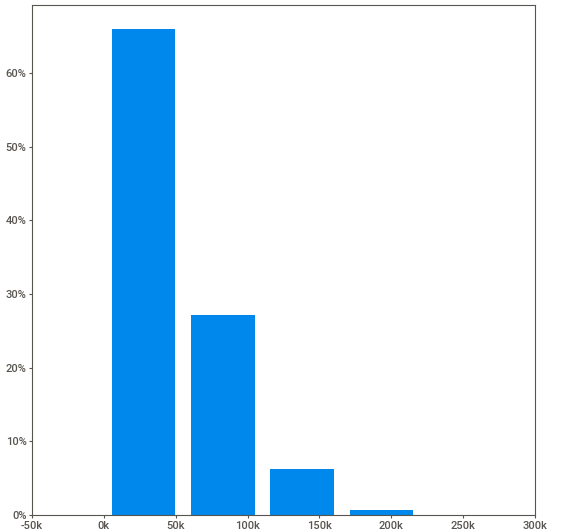
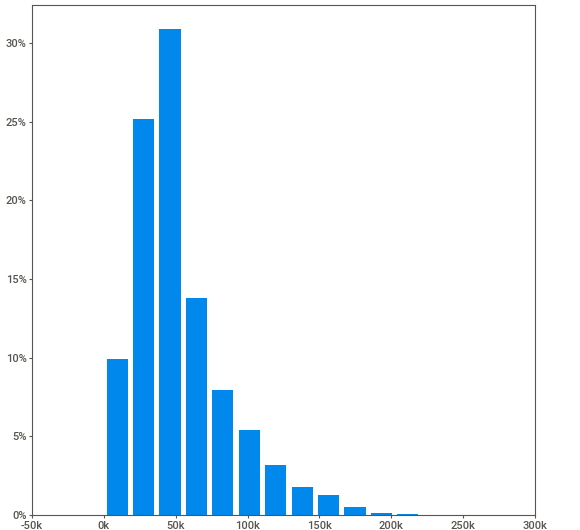
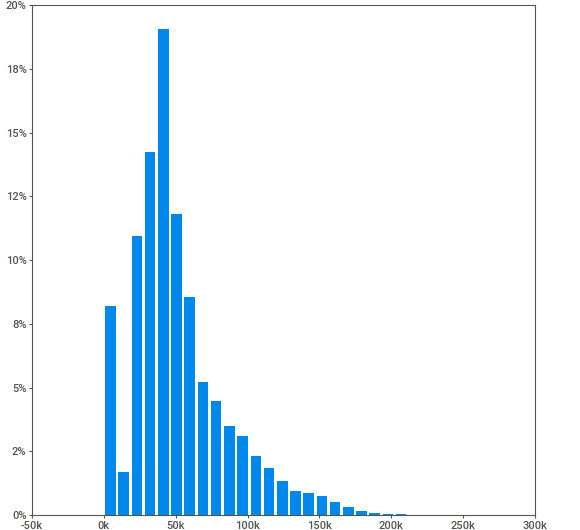
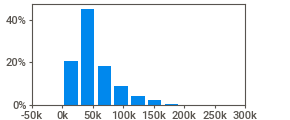
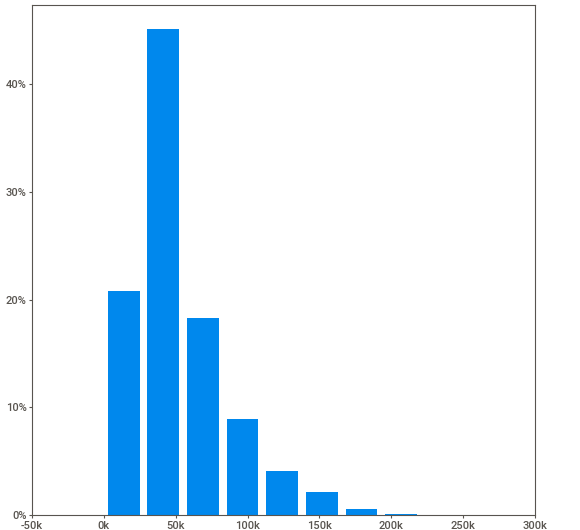
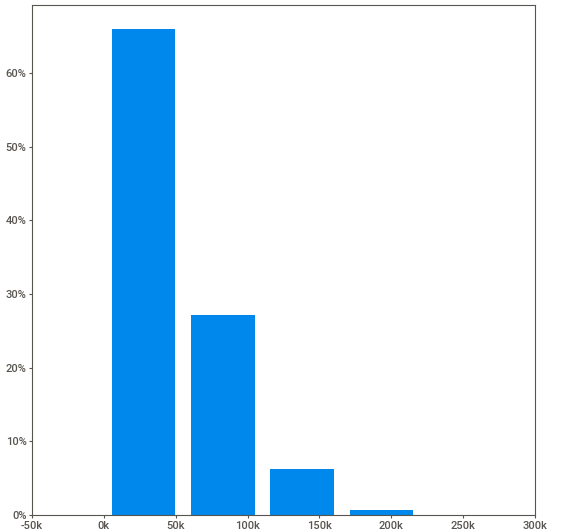
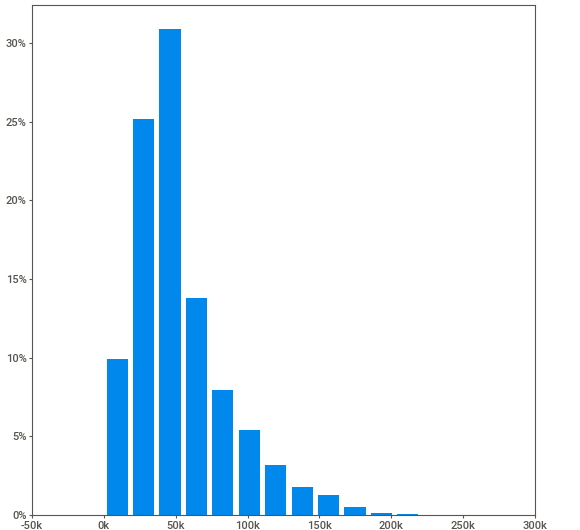
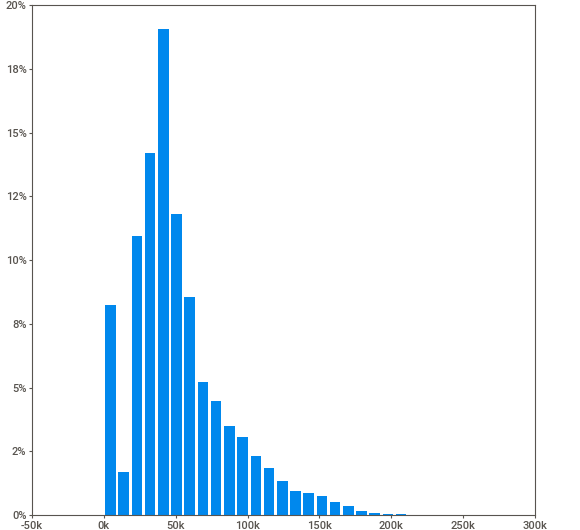
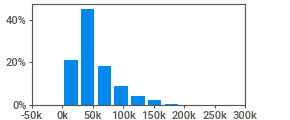
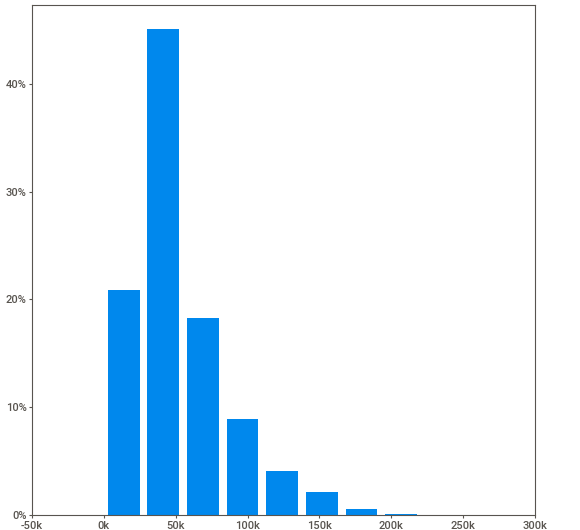
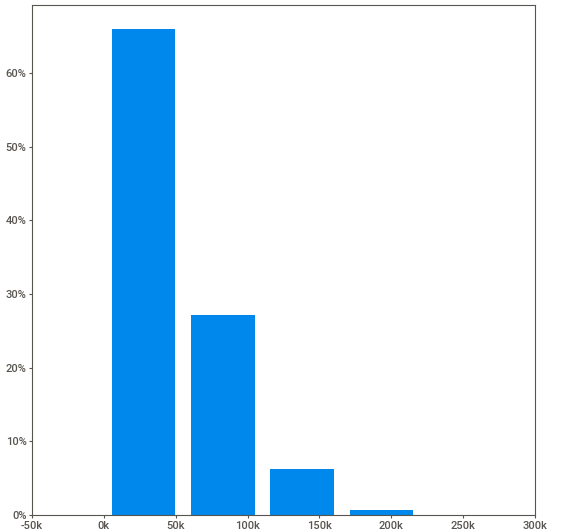
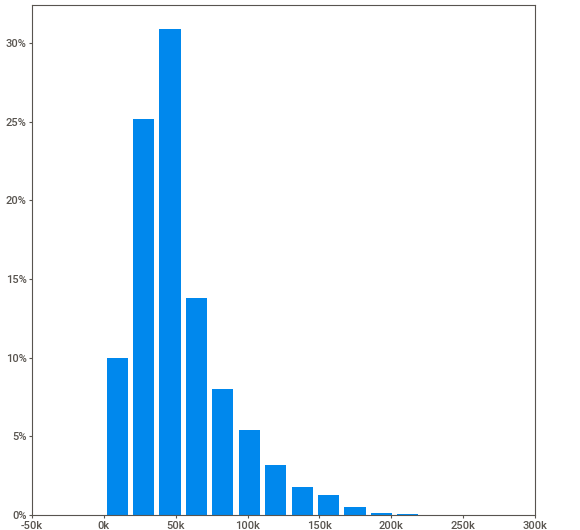
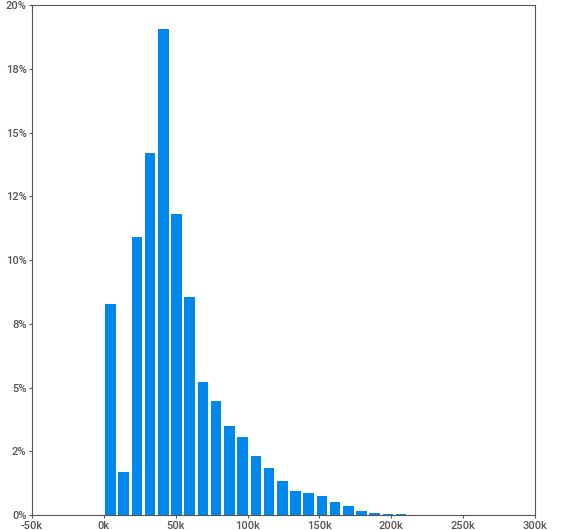
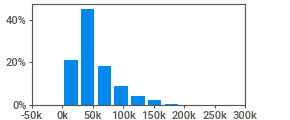
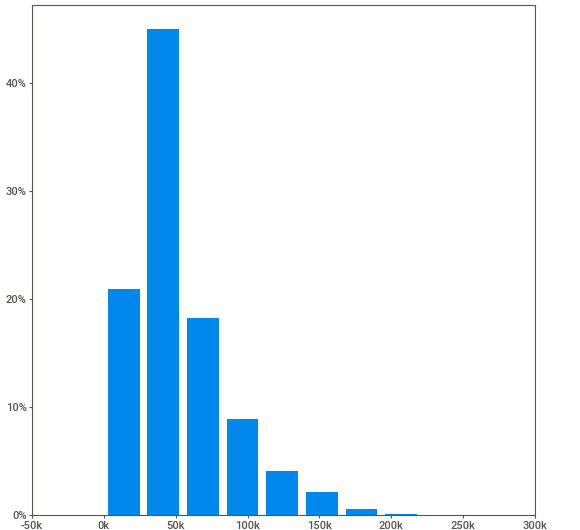
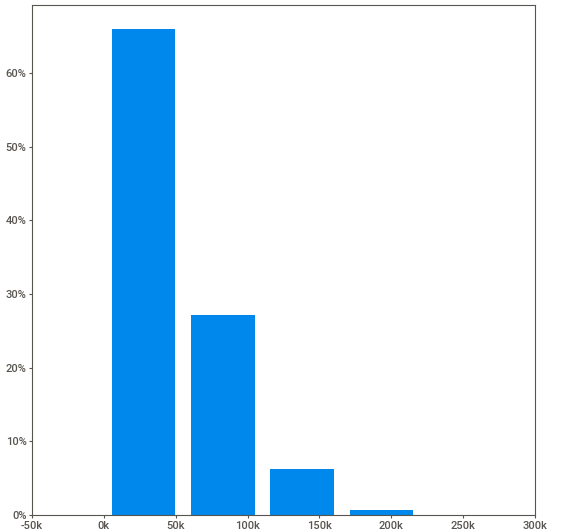
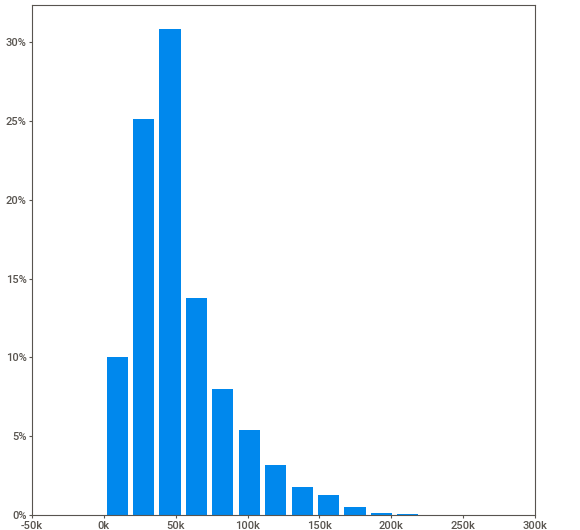
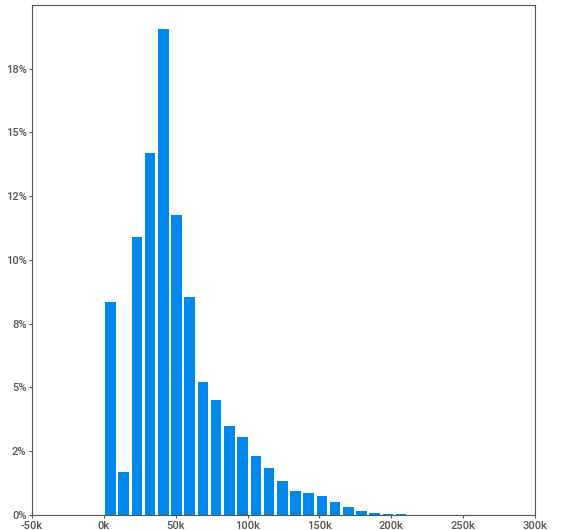
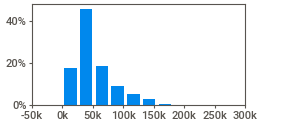
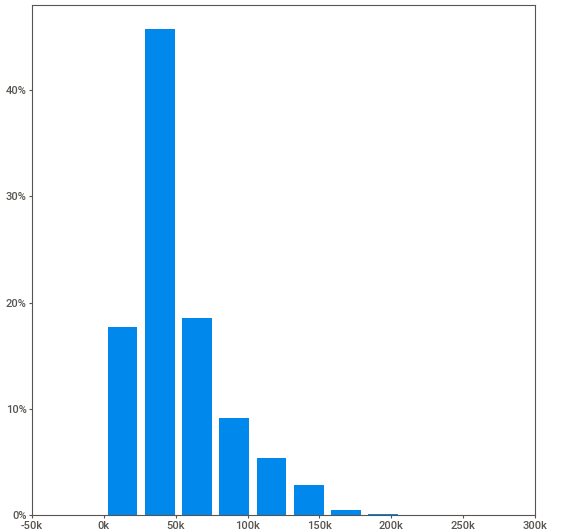
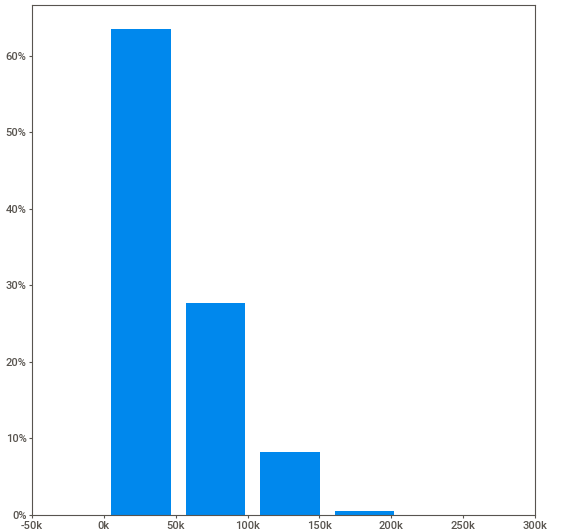
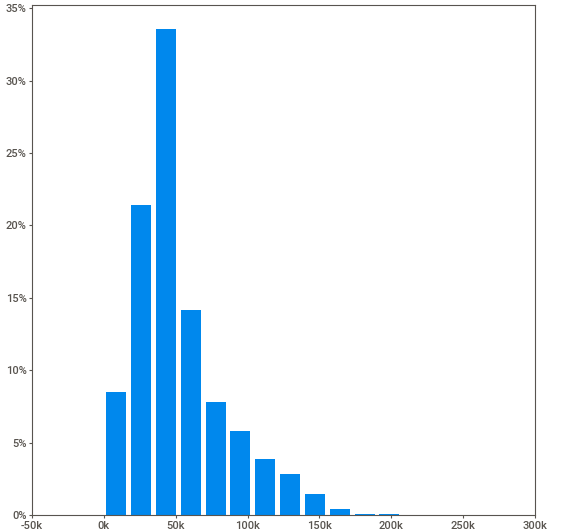
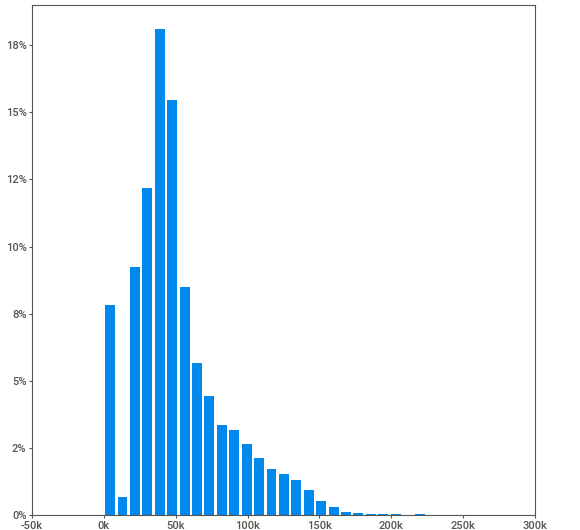
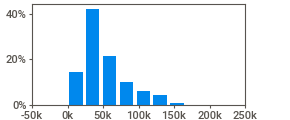
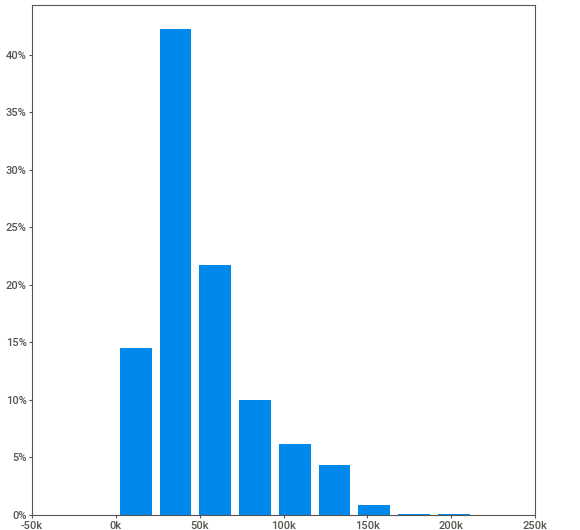
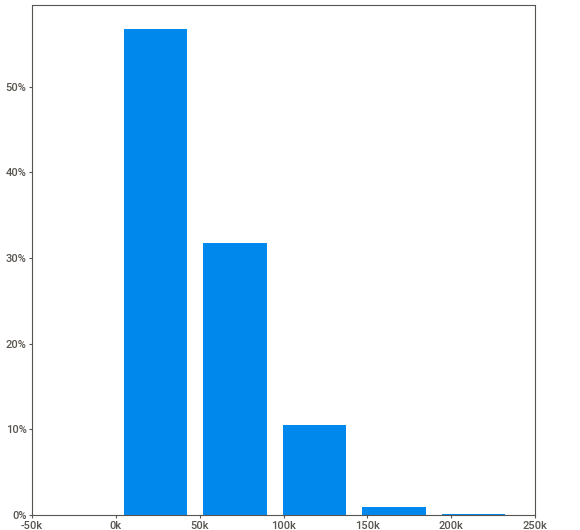
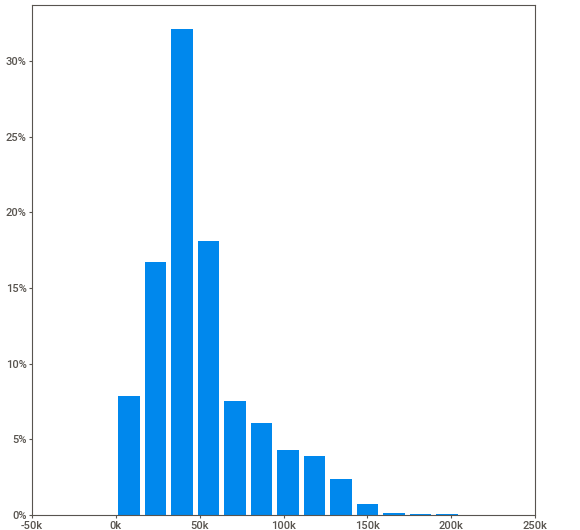
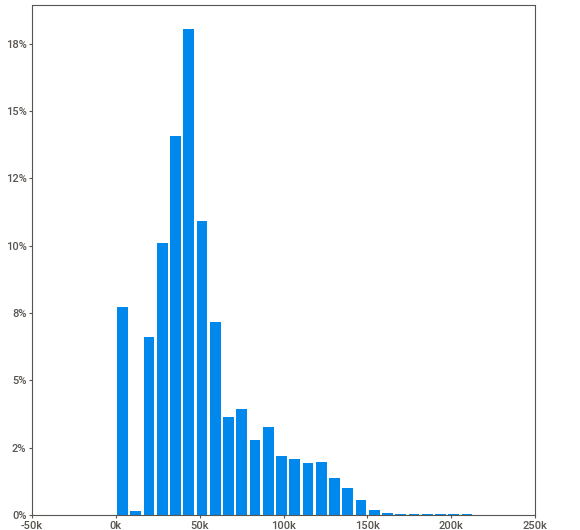
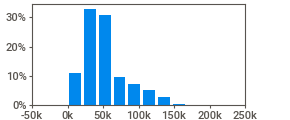
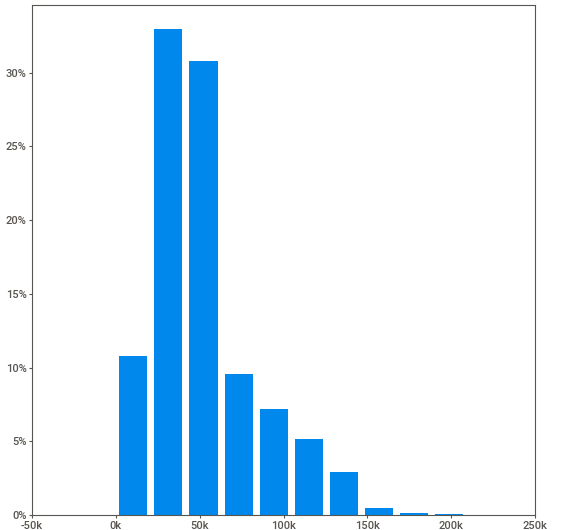
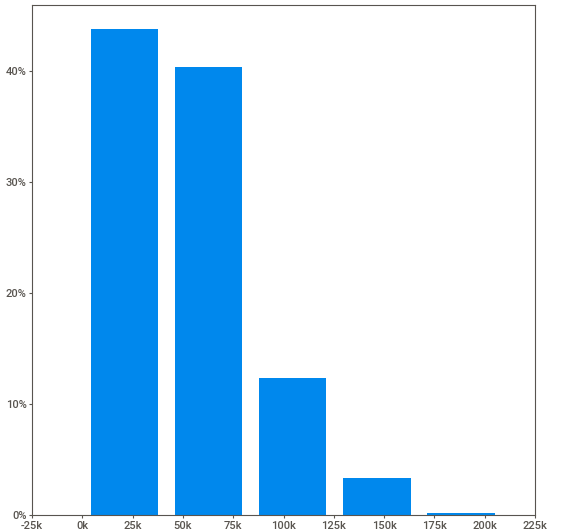
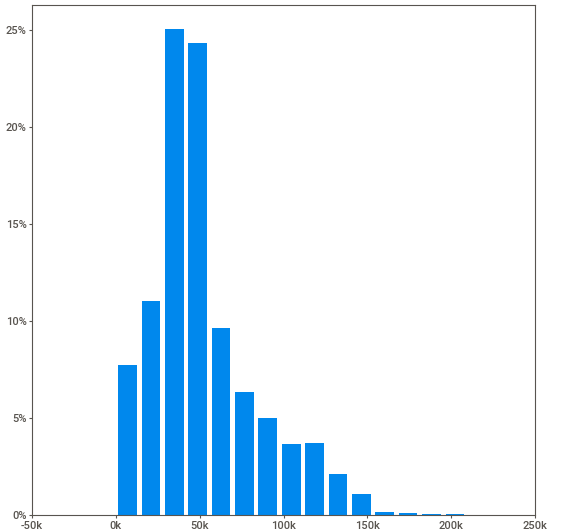
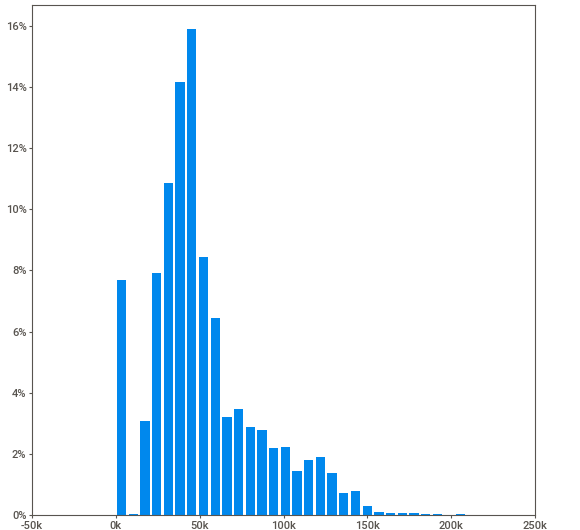
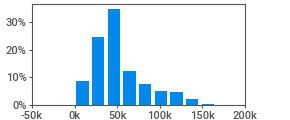
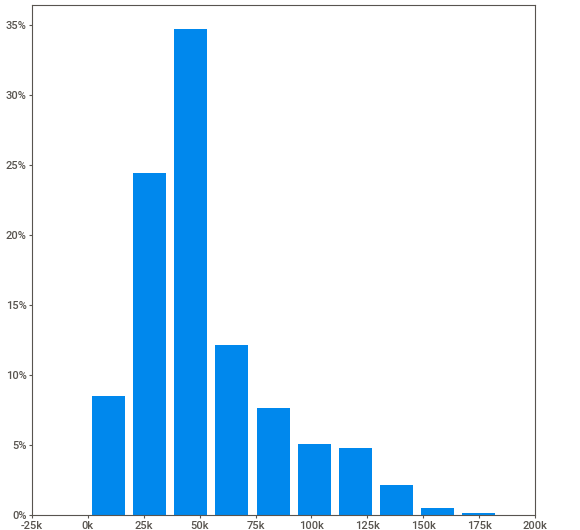
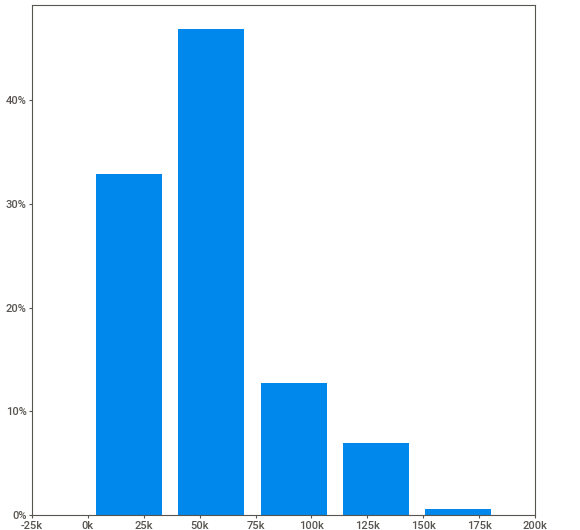
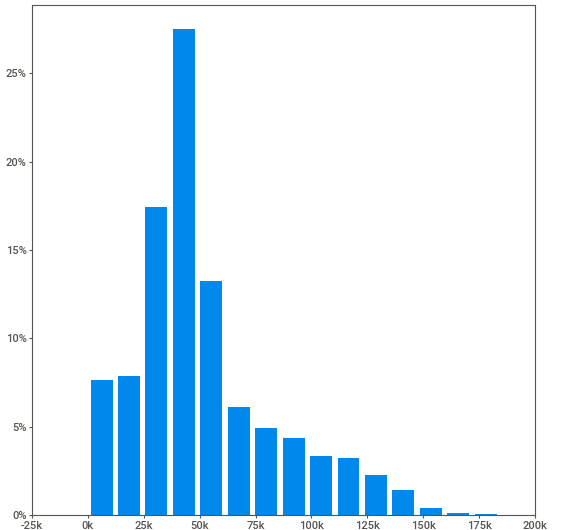
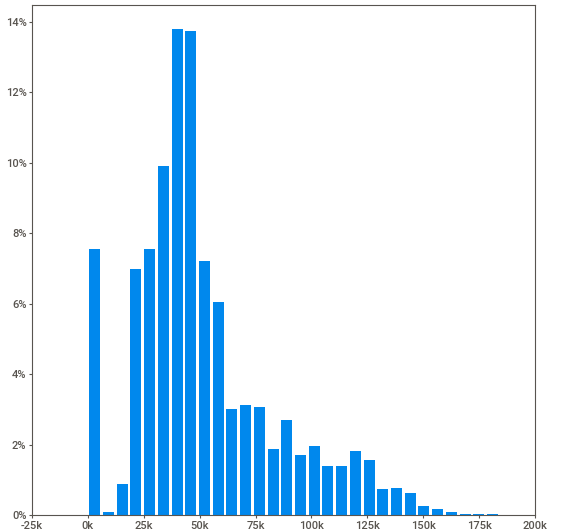
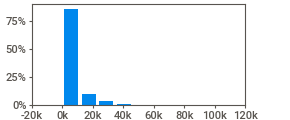
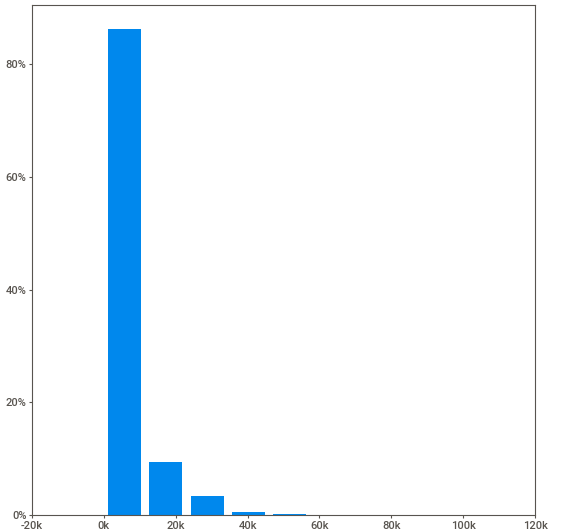
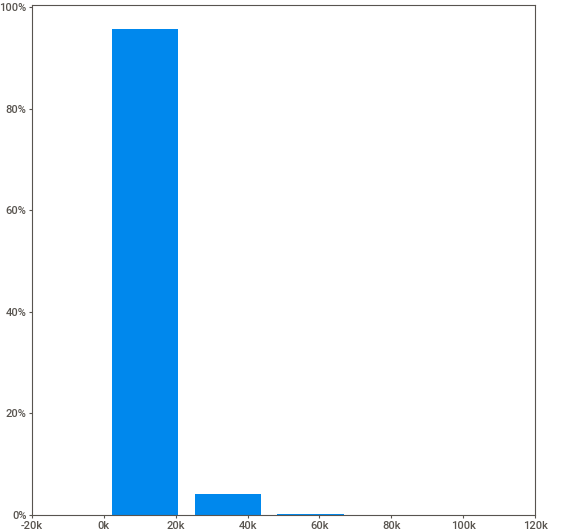
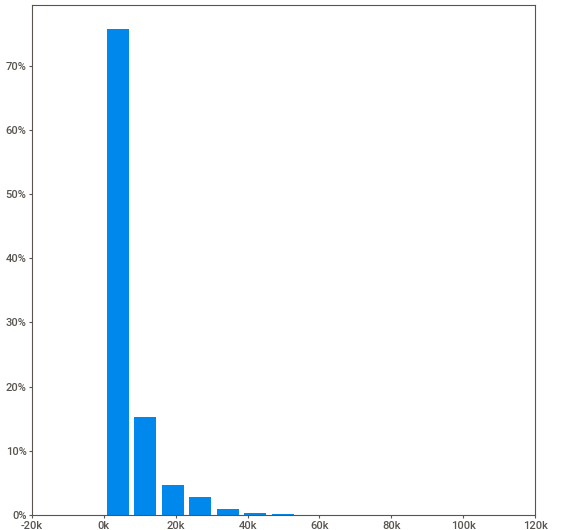
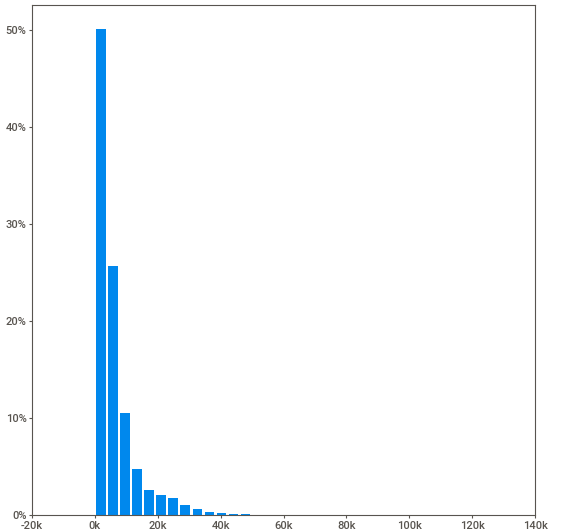
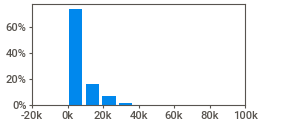
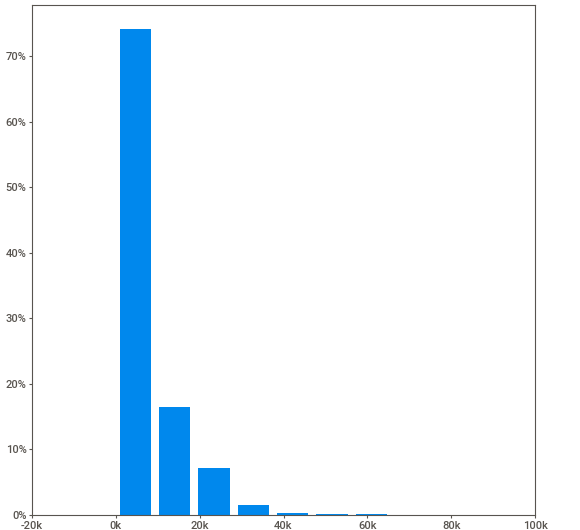
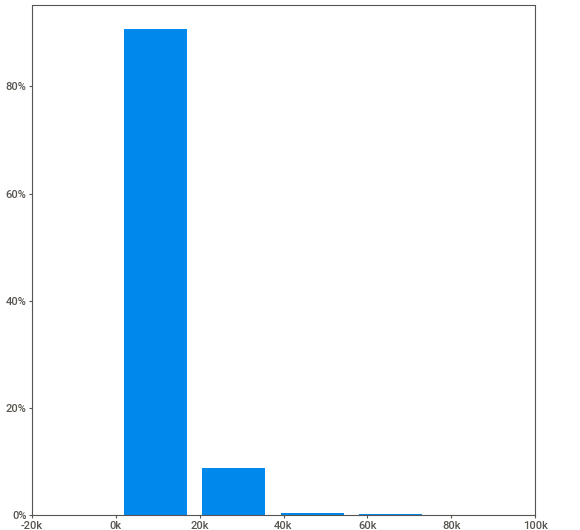
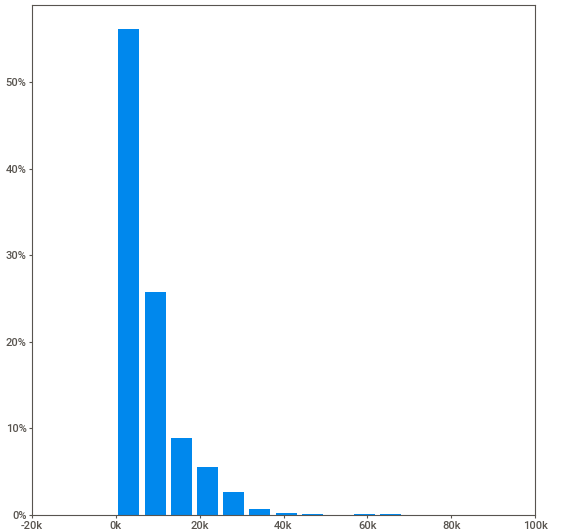
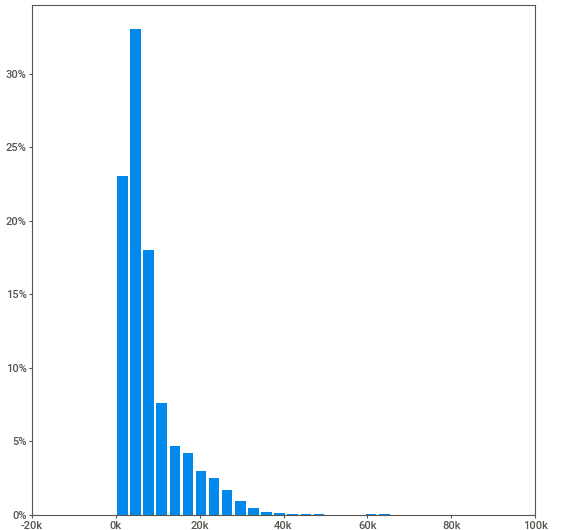
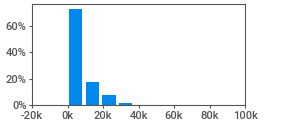
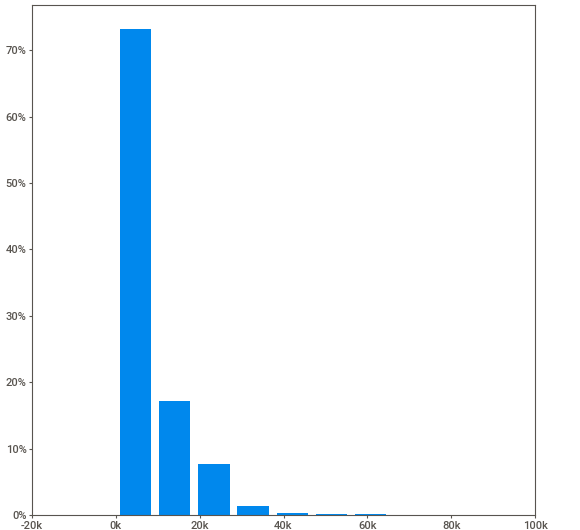
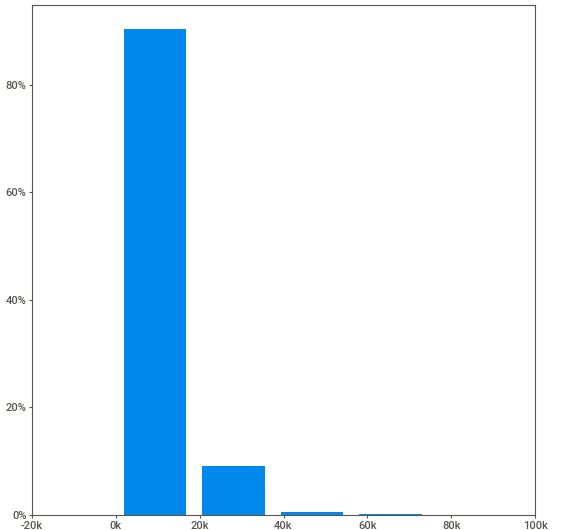
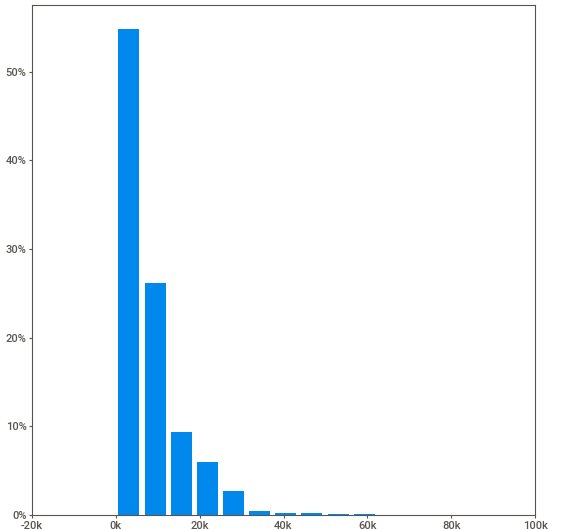
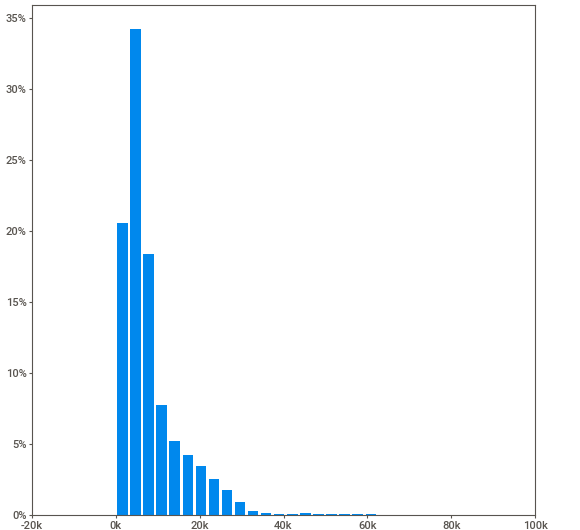
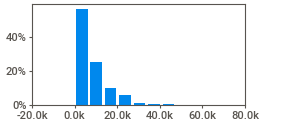
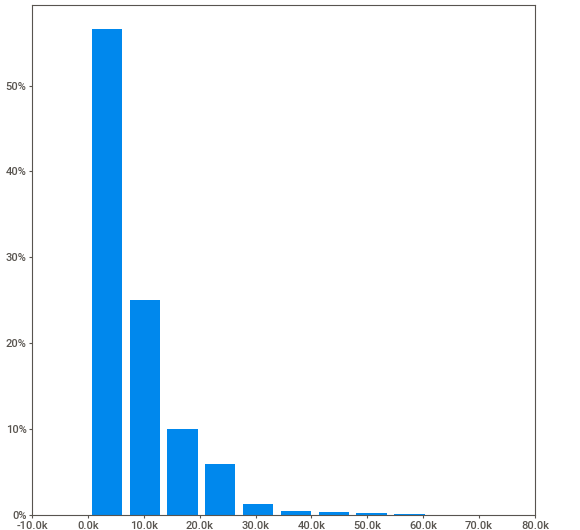
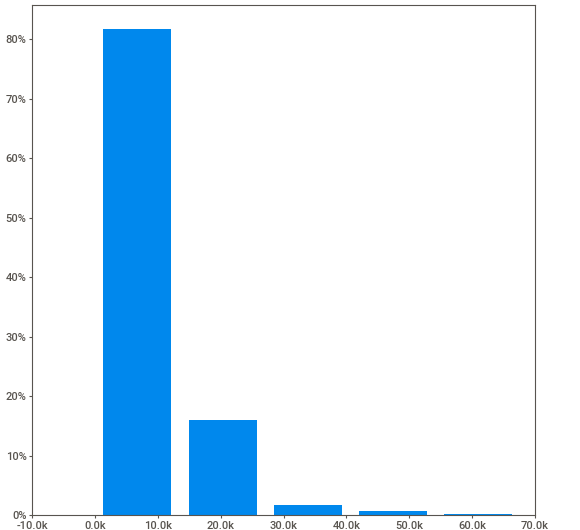
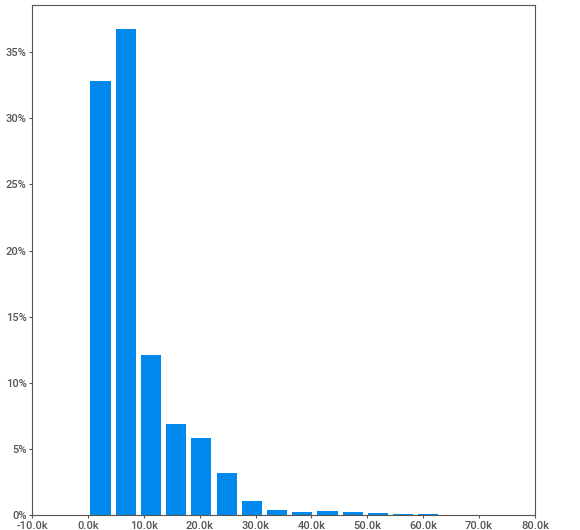
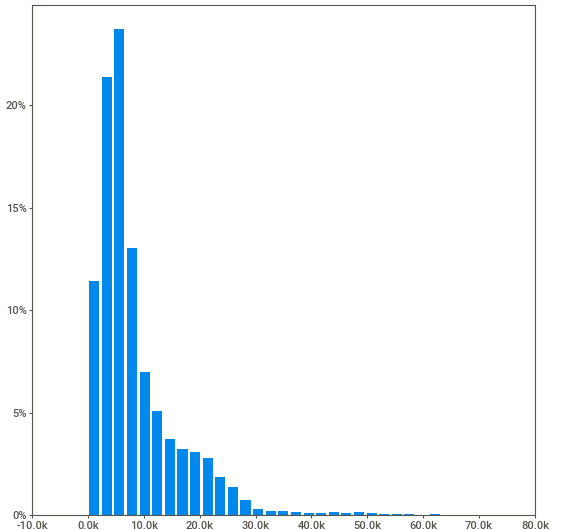
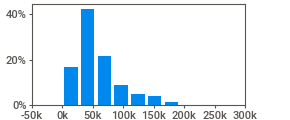
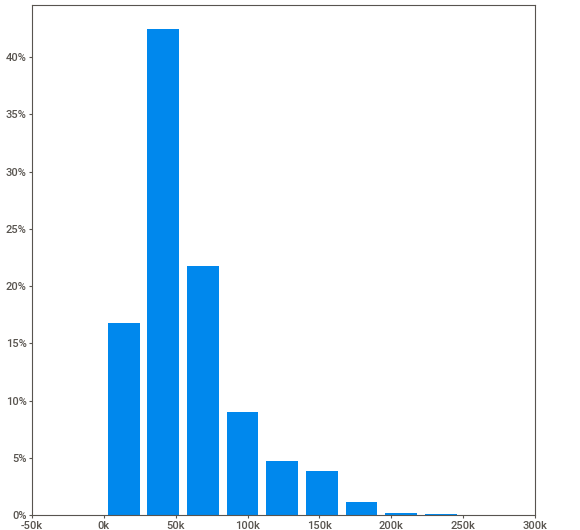
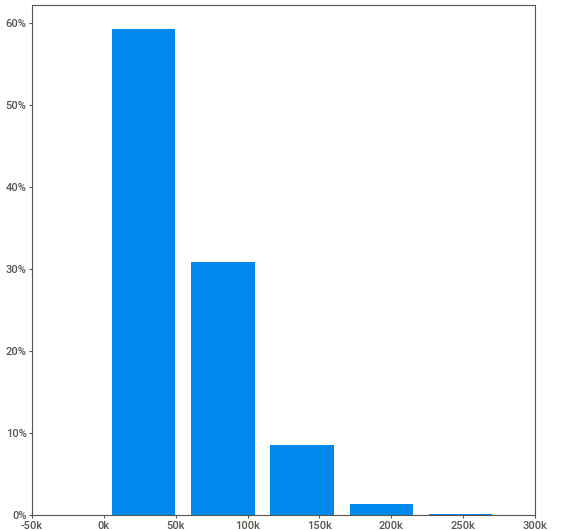
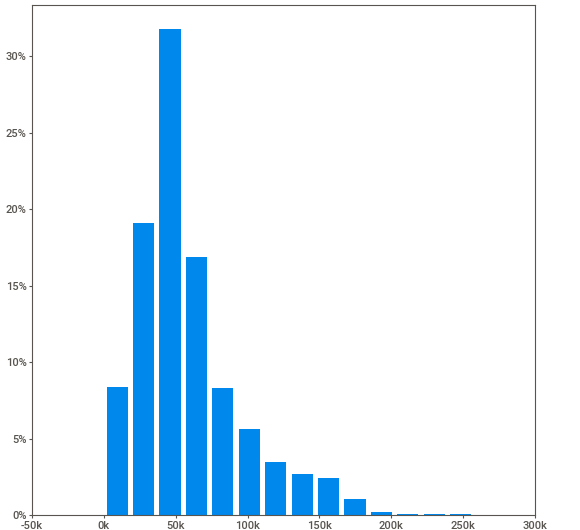
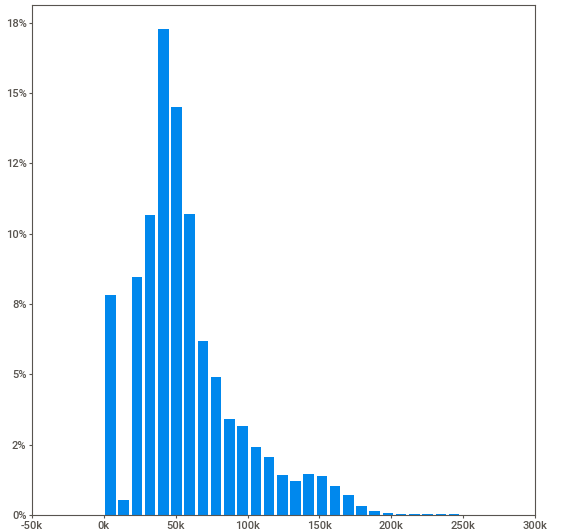
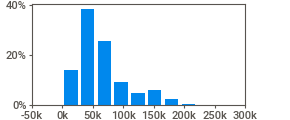
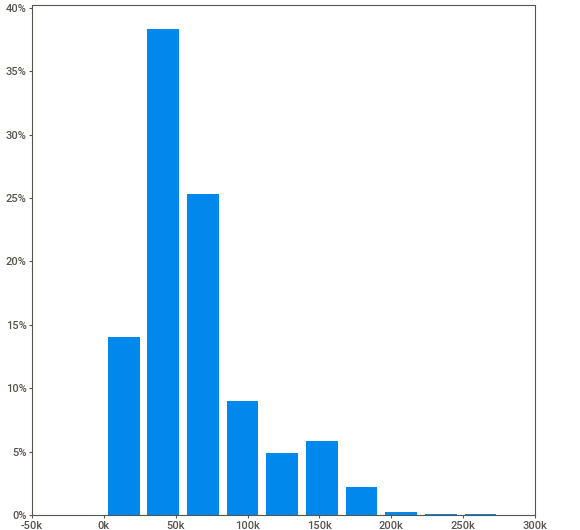
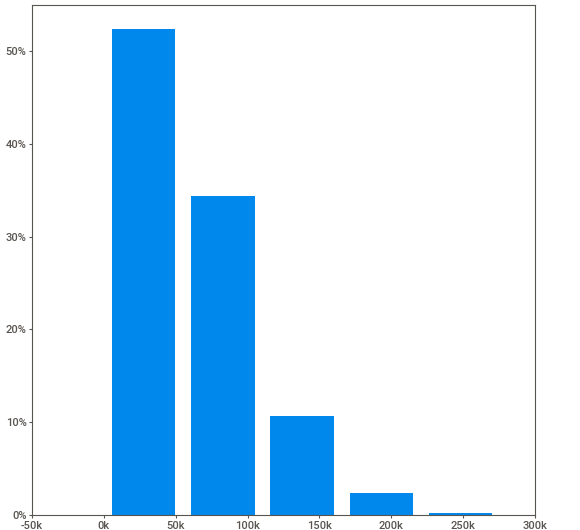
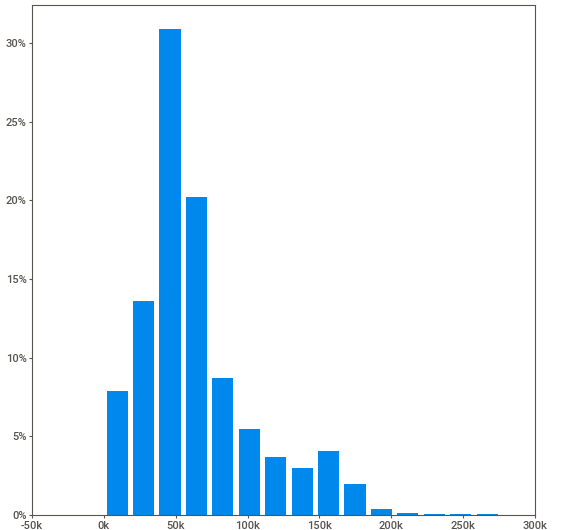
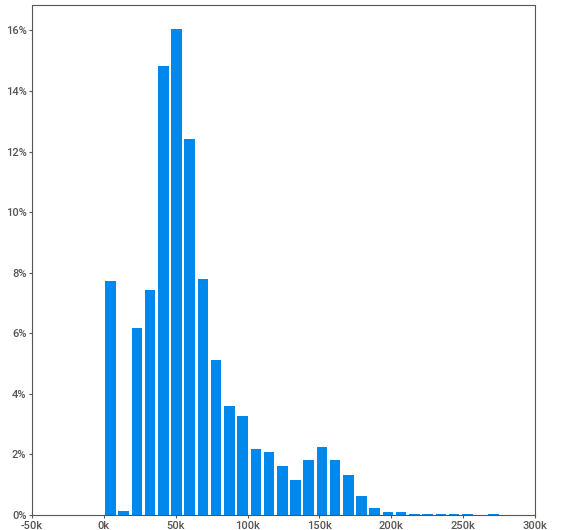
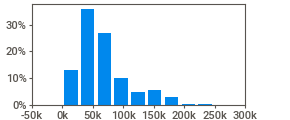
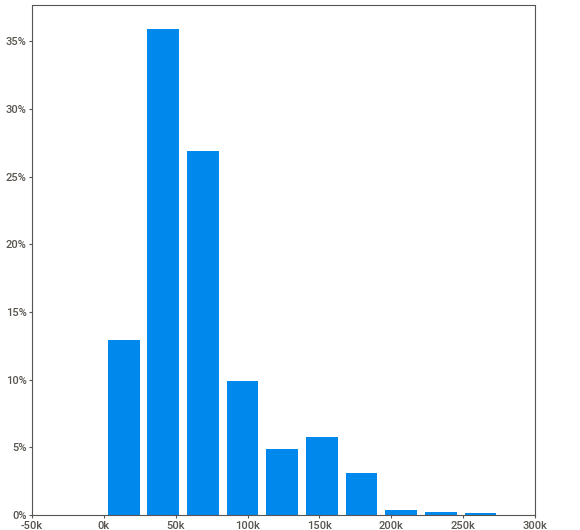
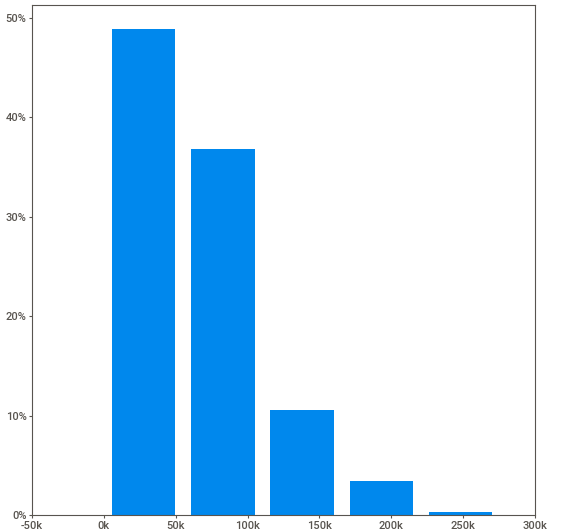
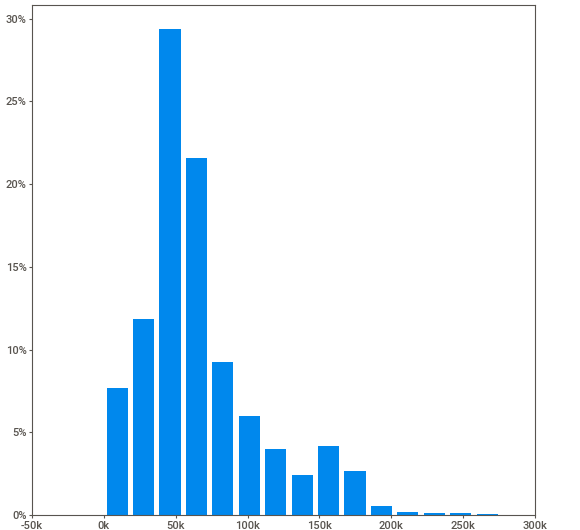
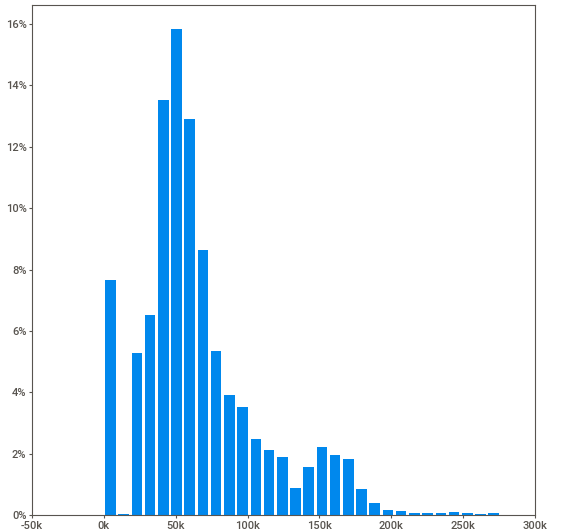
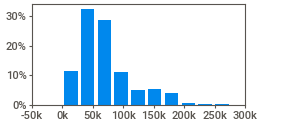
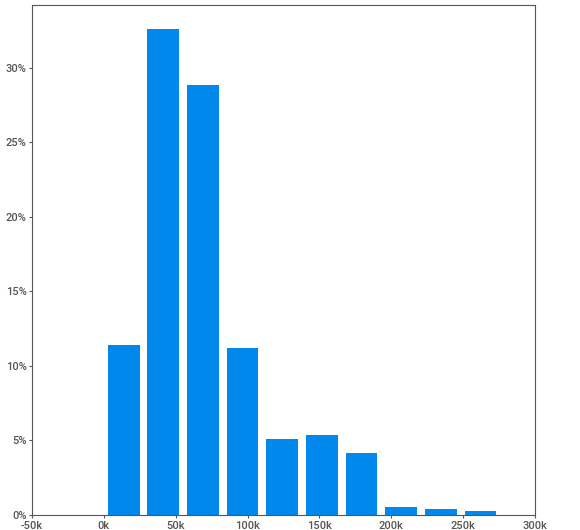
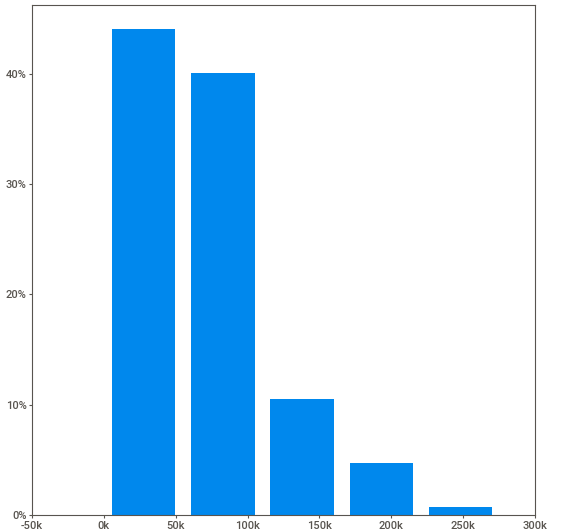
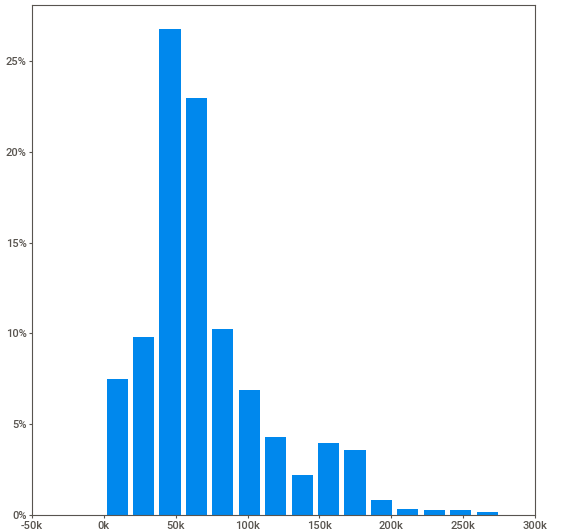
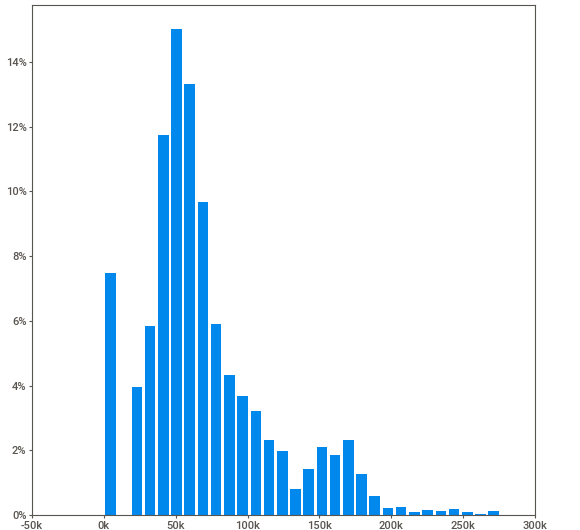
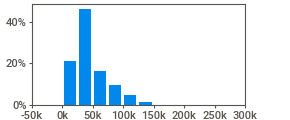
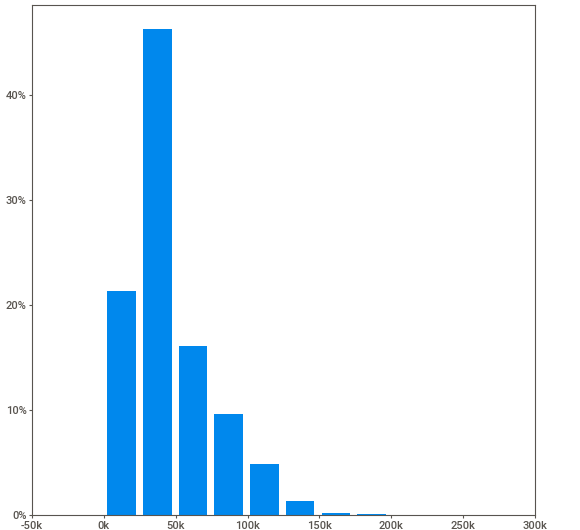
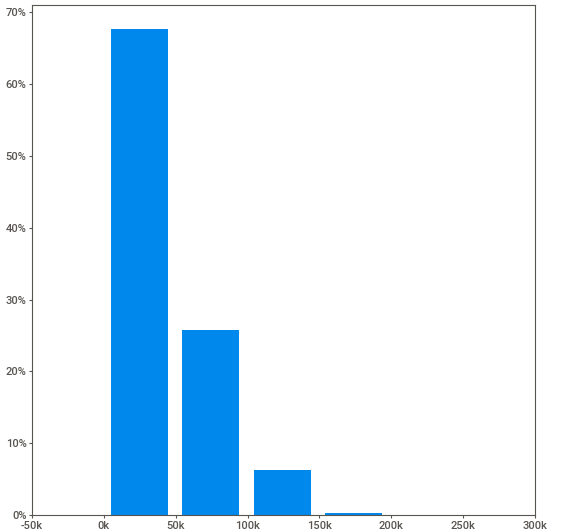
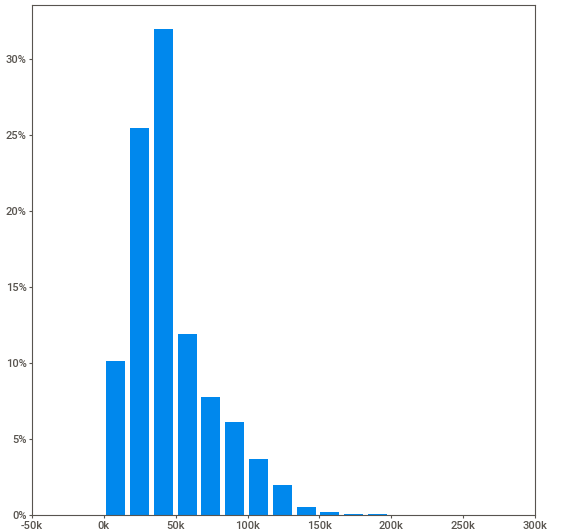
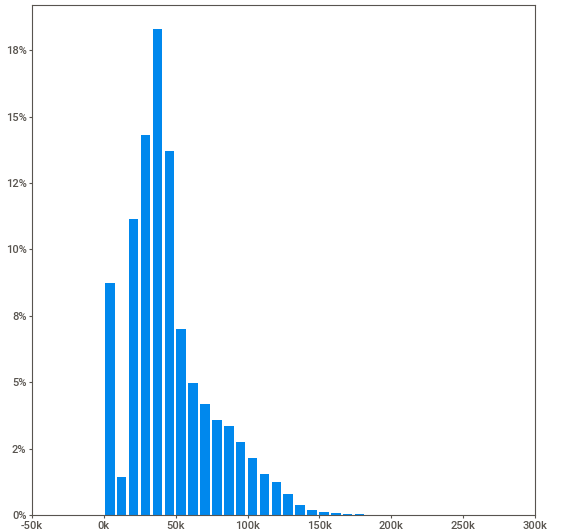
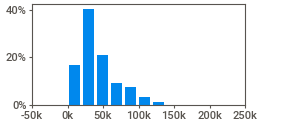
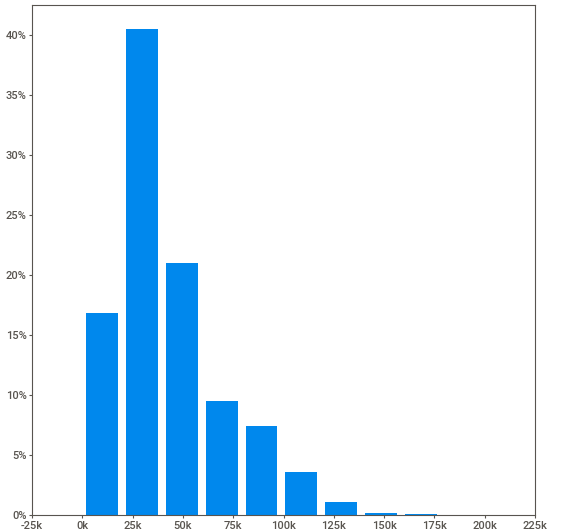
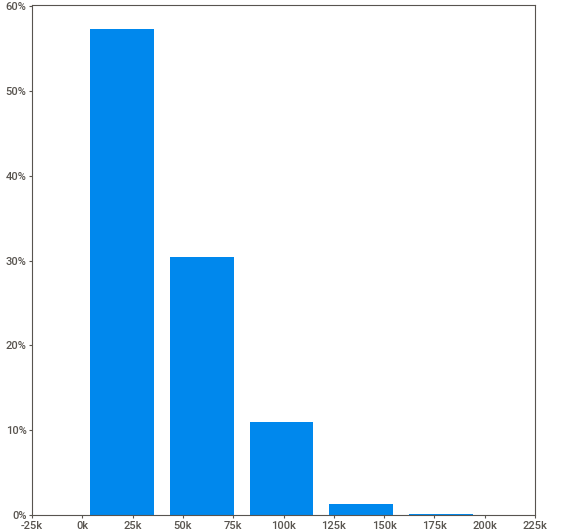
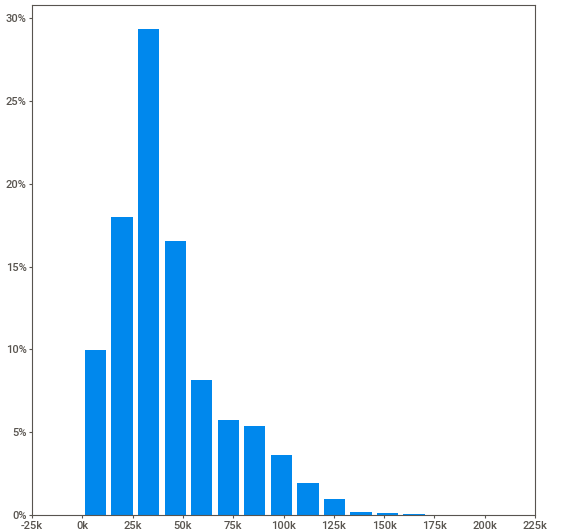
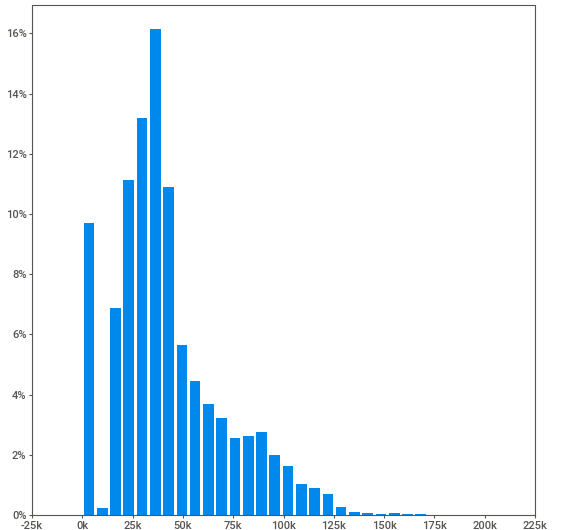
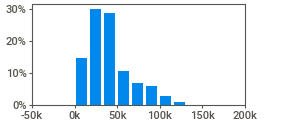
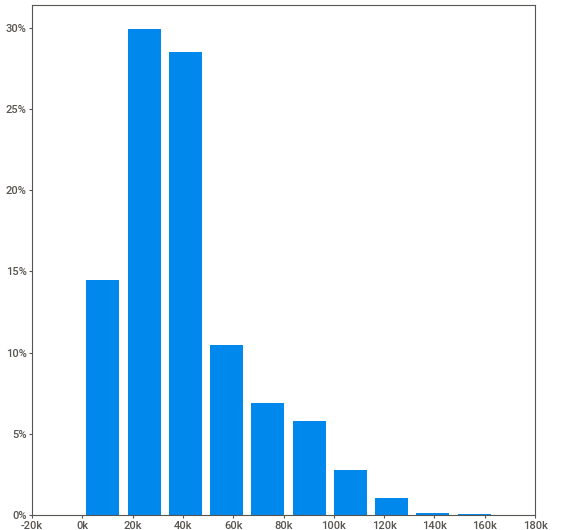
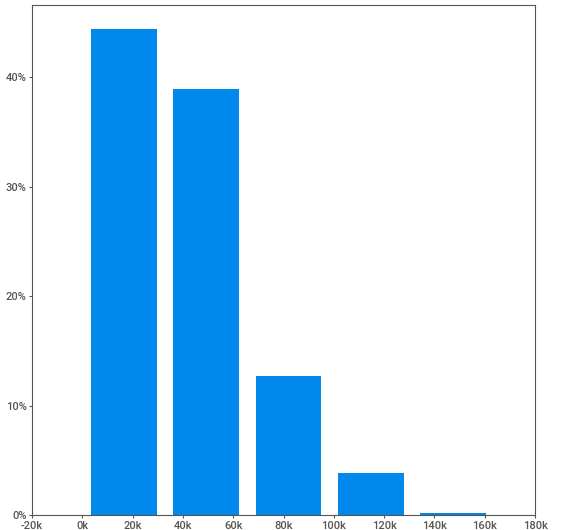
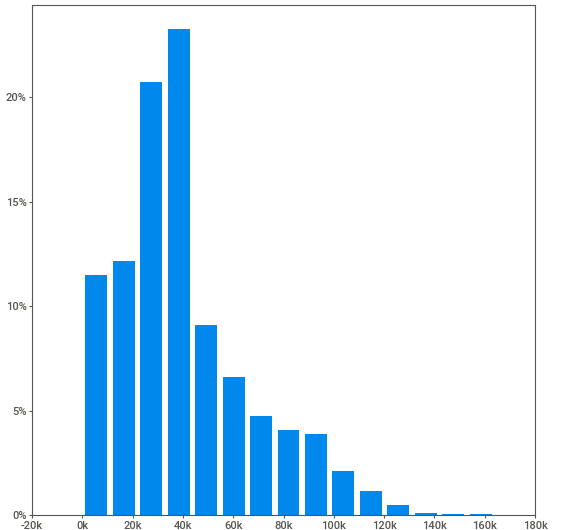
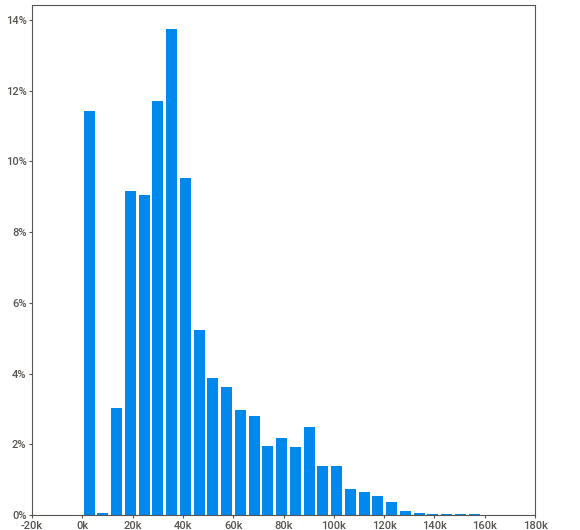
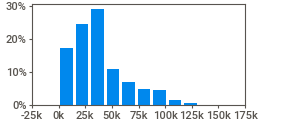
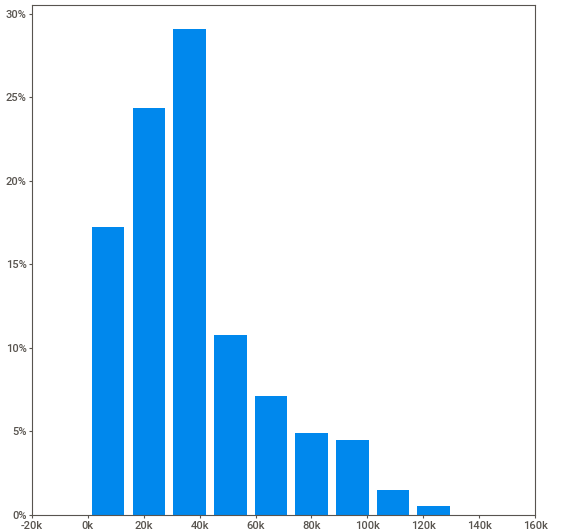
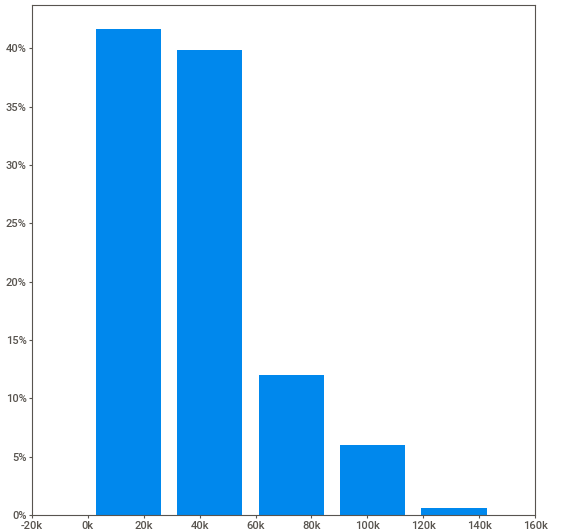
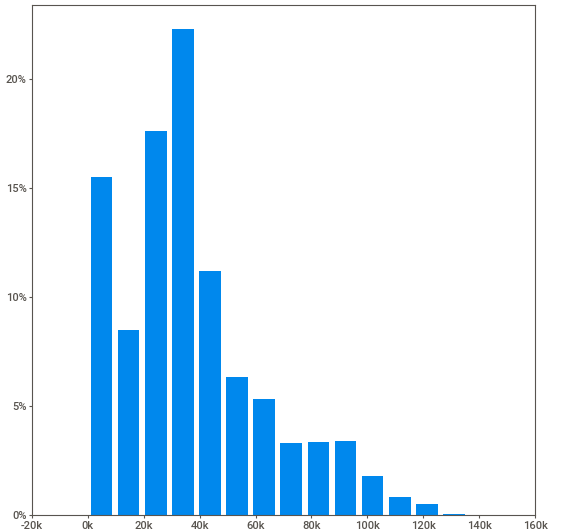
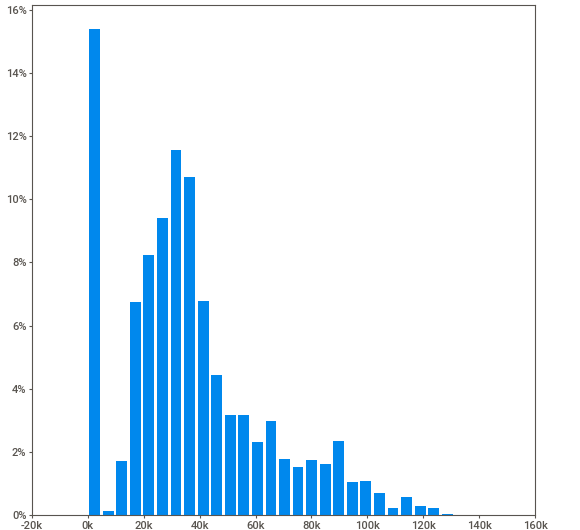

In [18]:
# auto eda 
eda_report = sweetviz.analyze(
    data_with_features[targets + store_features + date_features + sales_features + trans_features],
    pairwise_analysis="off"
)
eda_report.show_notebook()